# House price prediction using Regularized Linear Regression

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Data understanding & preparation

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df = pd.read_csv("train.csv")
print(df.shape)

(1460, 81)


In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Since there are valid categories called "NA" being interpreted as missing values by pandas, we'll have to change the method of reading this dataset.

In [4]:
df = pd.read_csv("train.csv", keep_default_na=False)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [5]:
# Understand available features in dataset
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

### Dropping irrelevant column

In [7]:
df.drop("Id", axis=1, inplace=True)

### Correcting data types

In [8]:
# Change categorical columns to object datatype
df[[
    "MSSubClass", "OverallQual", "OverallCond", "BsmtFullBath", 
    "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "Fireplaces", "GarageCars"]] = df[["MSSubClass", "OverallQual", "OverallCond", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "Fireplaces", "GarageCars"]].astype("object")

"BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr"
# Change numeric columns to numeric datatype
df["LotFrontage"] = pd.to_numeric(df["LotFrontage"], errors="coerce")
df["MasVnrArea"] = pd.to_numeric(df["MasVnrArea"], errors="coerce")

In [9]:
# Check overall statistics of all columns
df.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,6.517808,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,1.625393,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,5.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,6.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,7.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,14.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Handle missing values

In [10]:
df.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

There are two columns with missing values: LotFrontage & MasVnrArea. Since missing values in LotFrontage comprise of almost 18% of the dataset, it would not be a good idea to drop the rows with missing values. We'll decide how to treat these missing values once EDA on the variables has been completed.

### EDA of numeric features

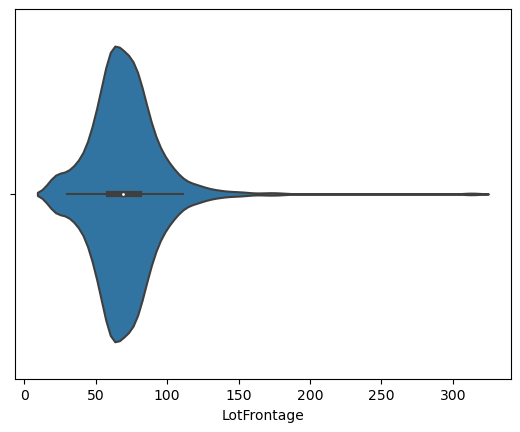

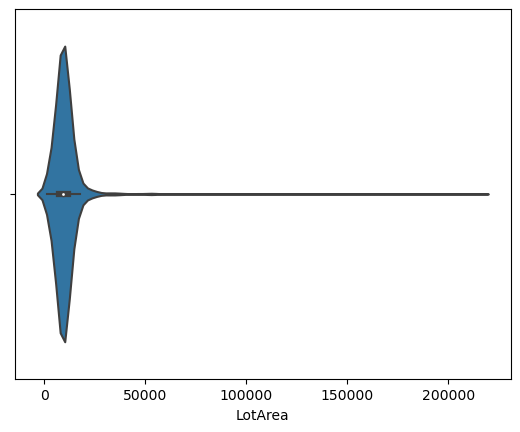

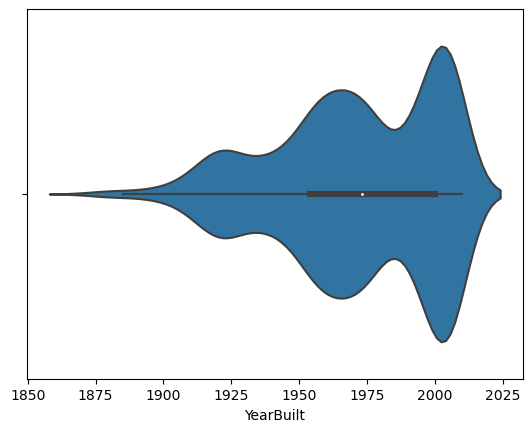

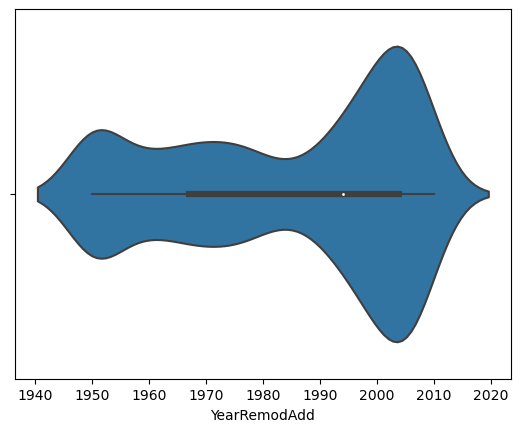

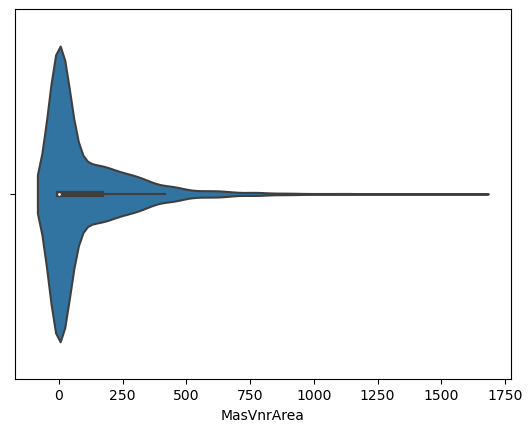

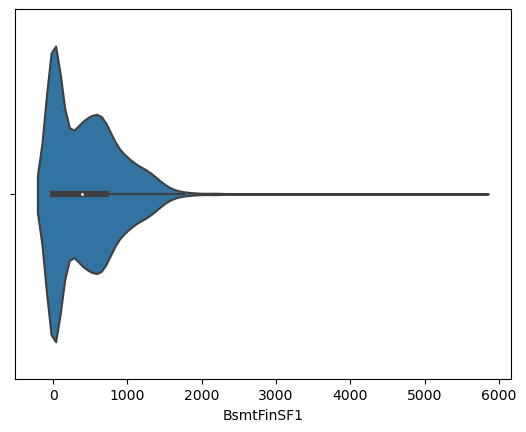

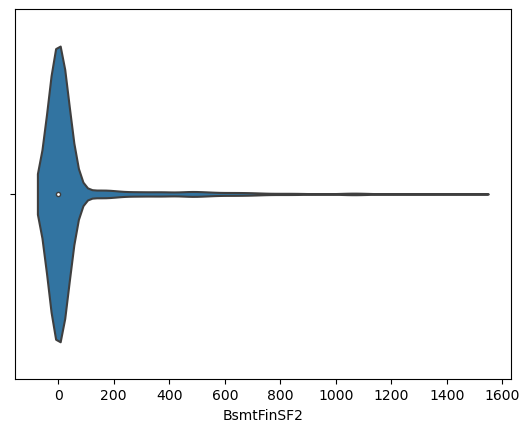

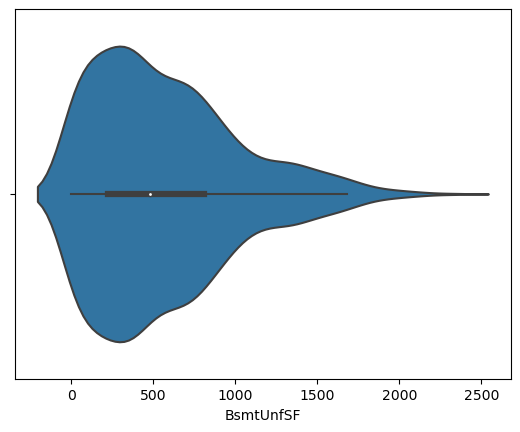

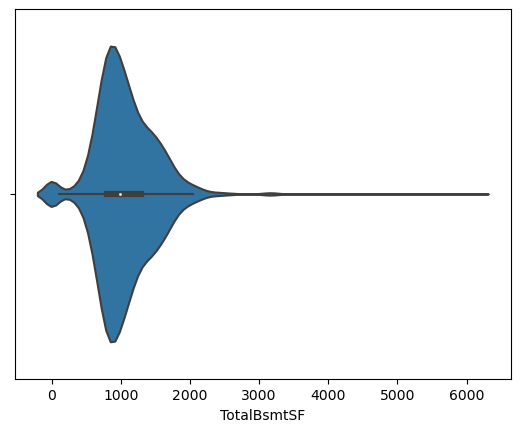

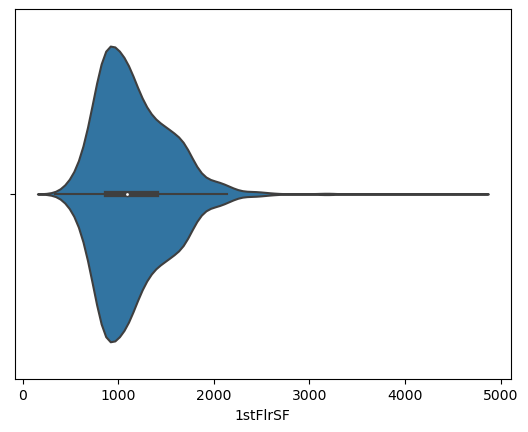

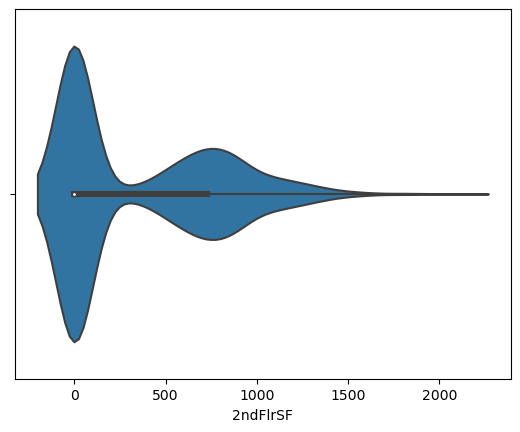

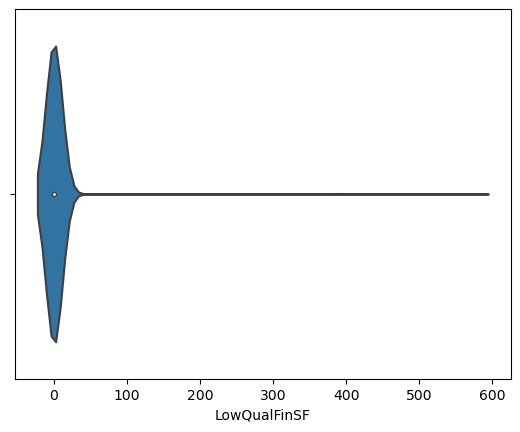

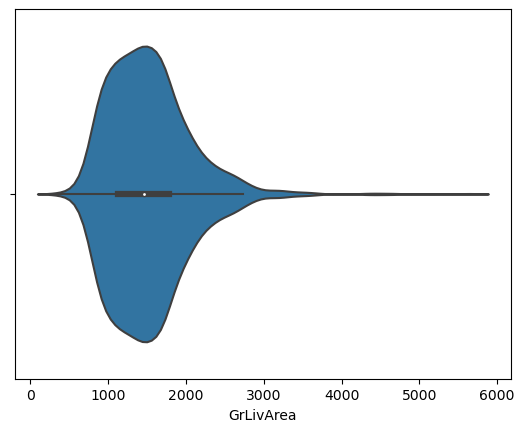

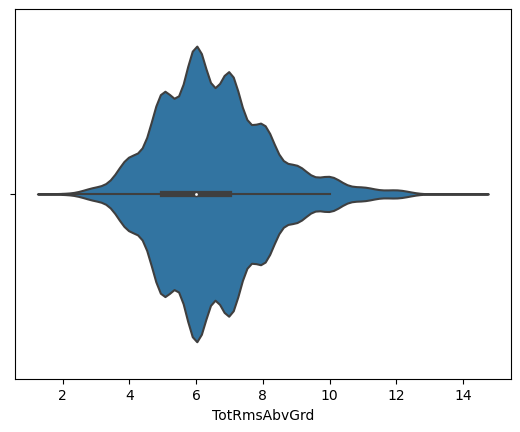

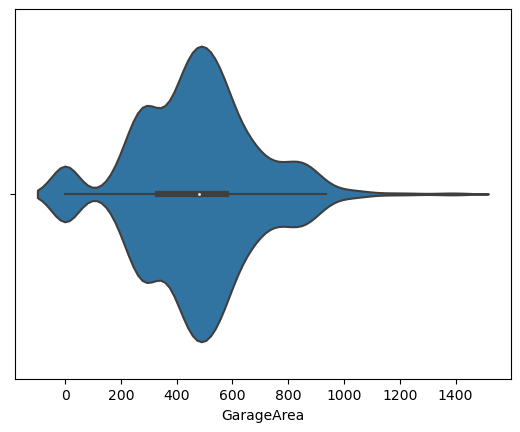

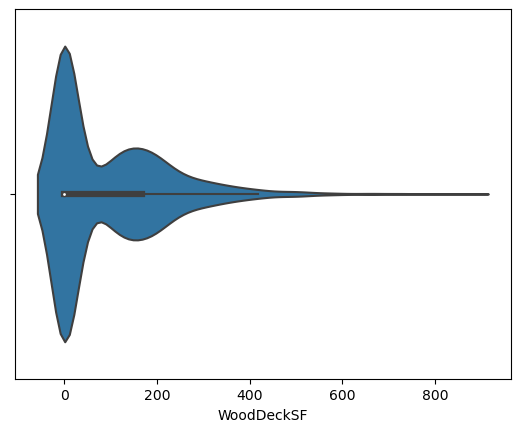

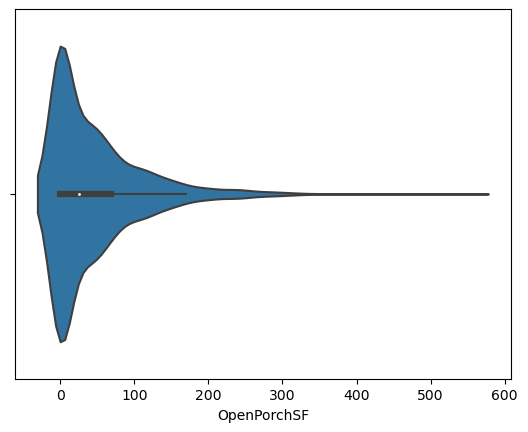

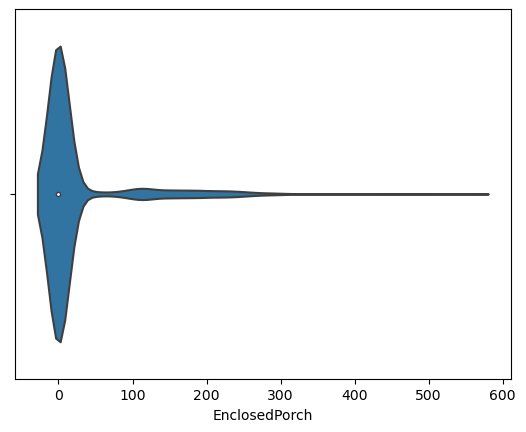

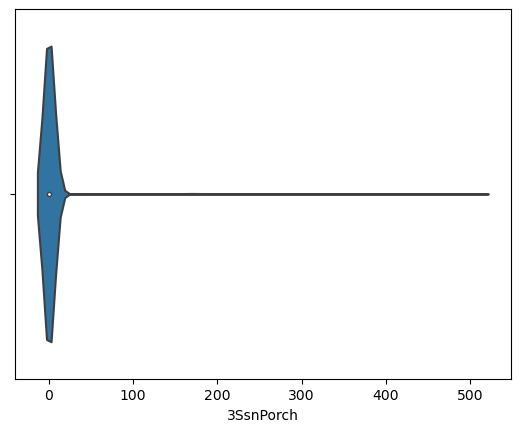

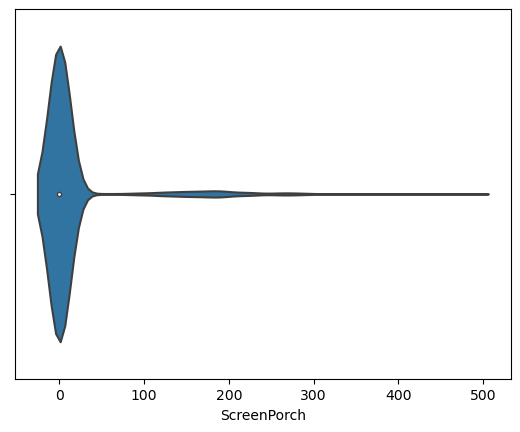

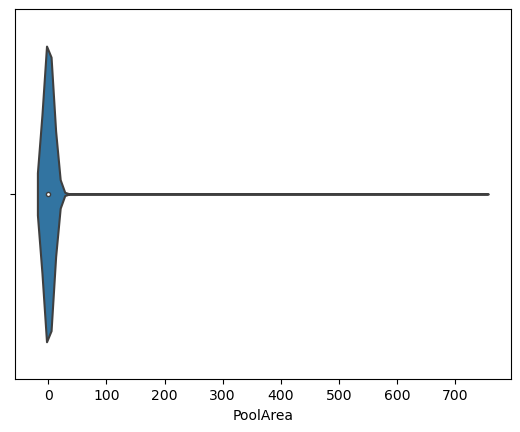

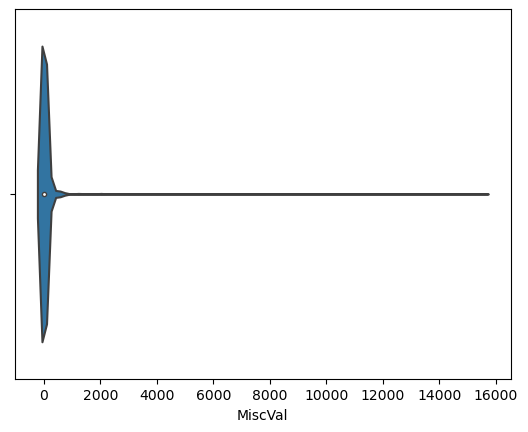

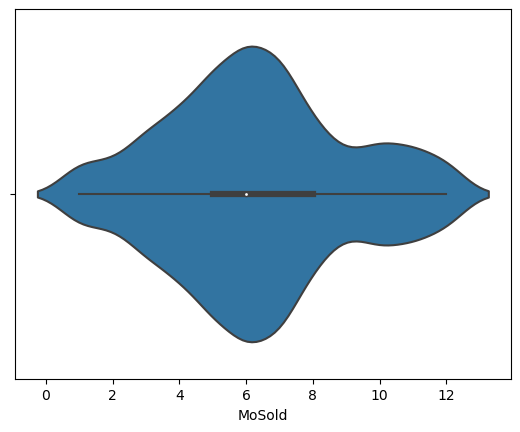

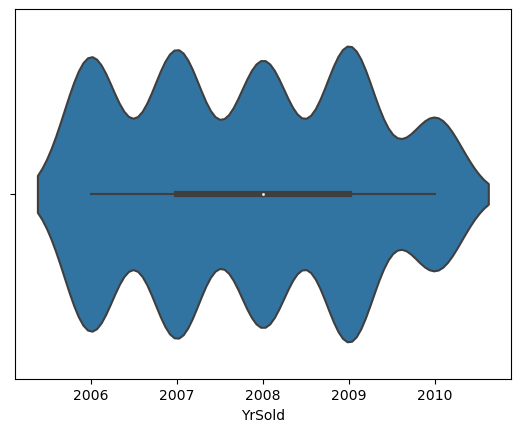

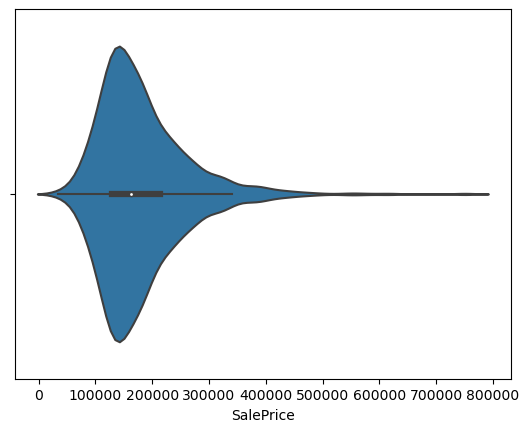

In [11]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
for col in numeric_df.columns:
    plt.figure()
    sns.violinplot(x = numeric_df[col])
    plt.xlabel(col)
    plt.show()

From the plots above, it can be seen that a lot of feature columns show the presence of outliers. Moreover, the target variable seems to have a right-skewed distribution. First, to treat the outliers present in the dataset, we clip the feature values such that they only lie between 5th and the 95th percentiles.

In [12]:
for col in numeric_df.columns:
    lower_bound = numeric_df[col].quantile(0.05)
    upper_bound = numeric_df[col].quantile(0.95)
    numeric_df[col] = numeric_df[col].clip(lower_bound, upper_bound)

<ipython-input-12-37bec4e1f7df>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df[col] = numeric_df[col].clip(lower_bound, upper_bound)


Let us check the violin plots of the numeric columns after outlier handling

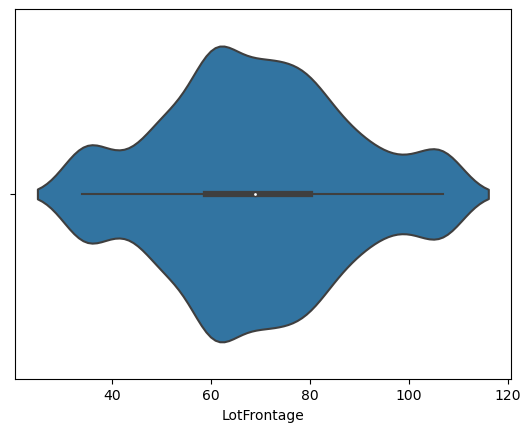

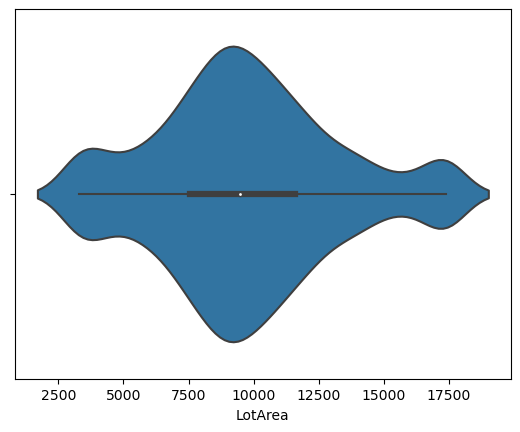

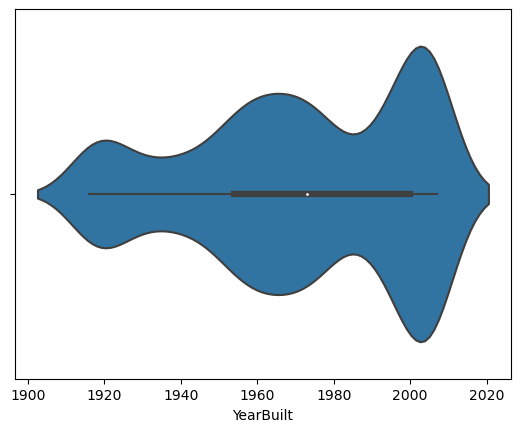

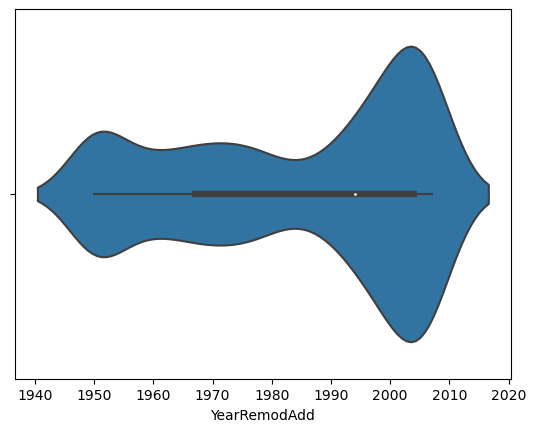

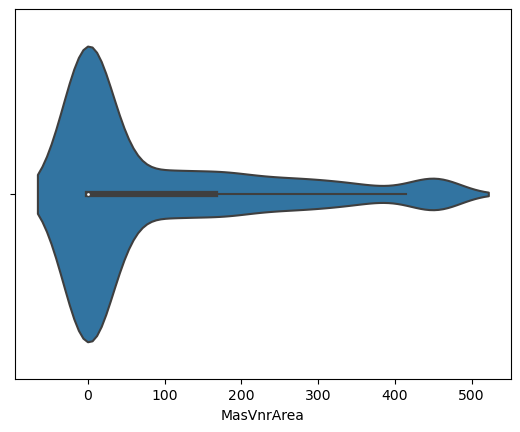

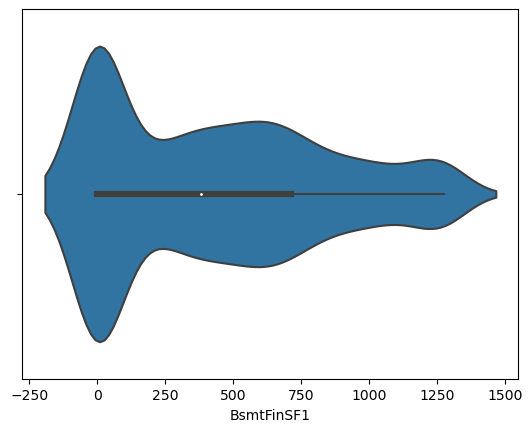

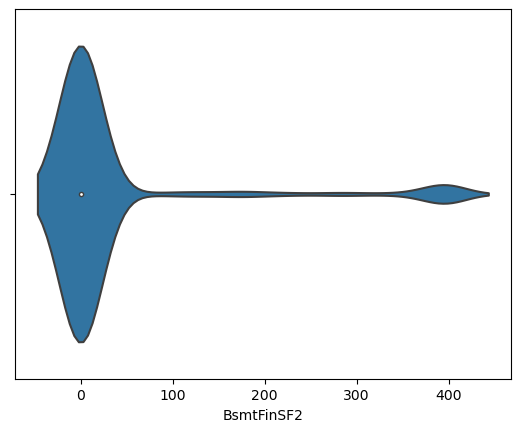

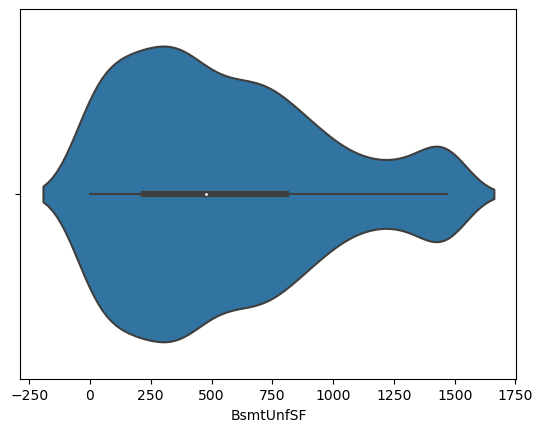

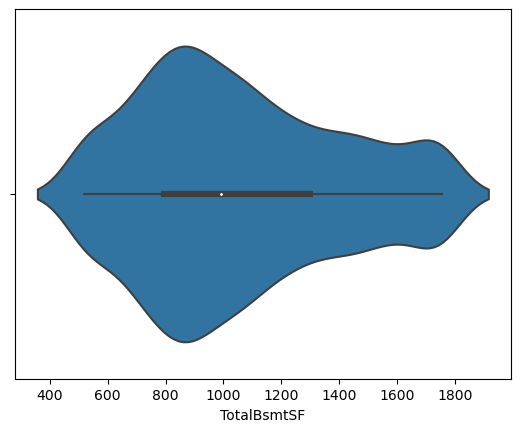

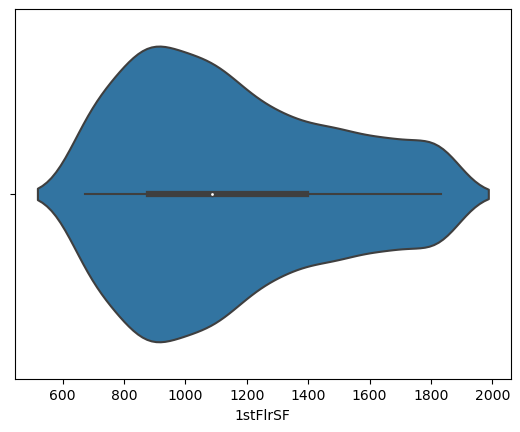

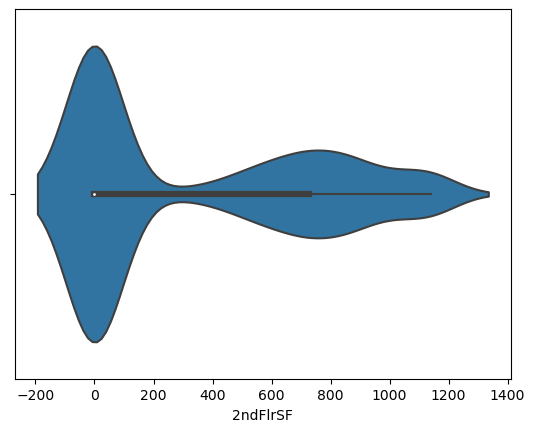

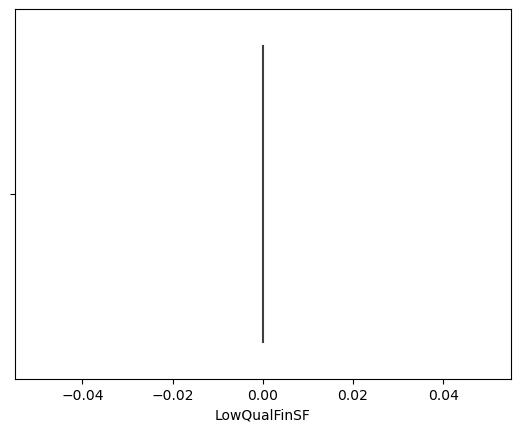

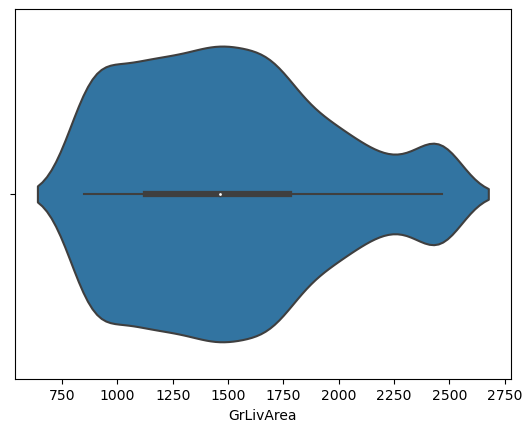

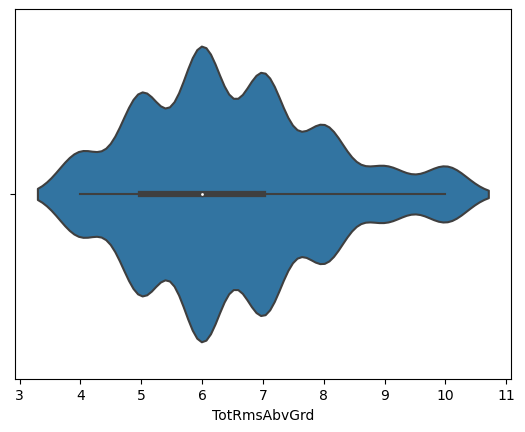

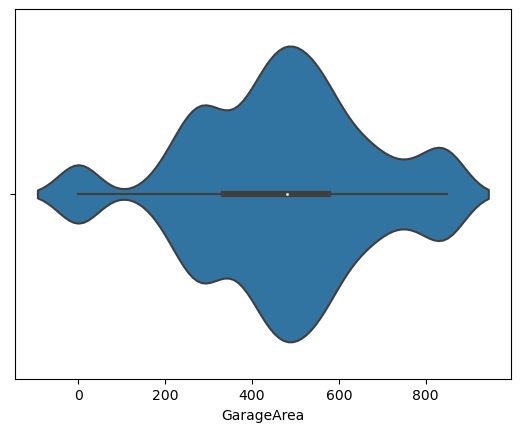

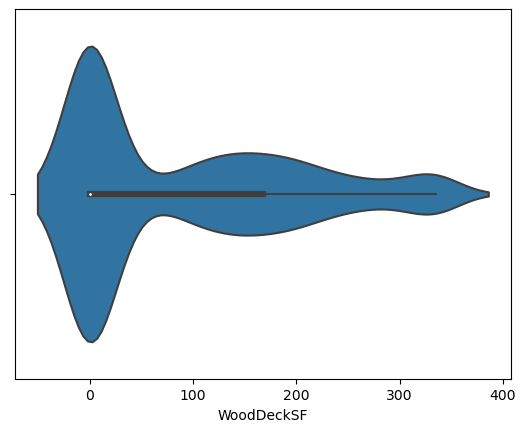

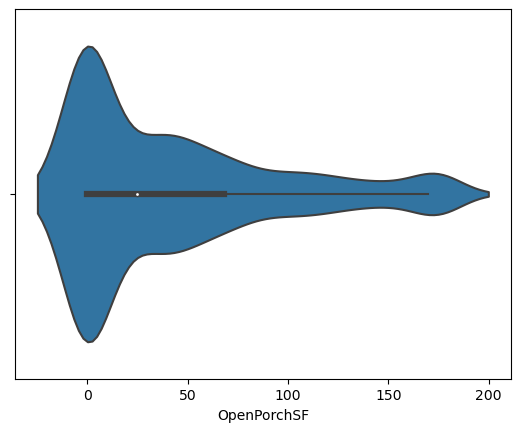

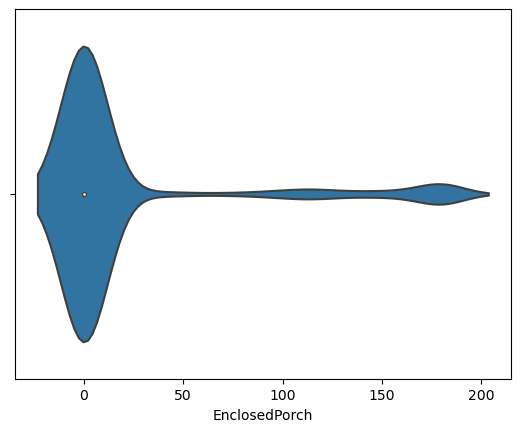

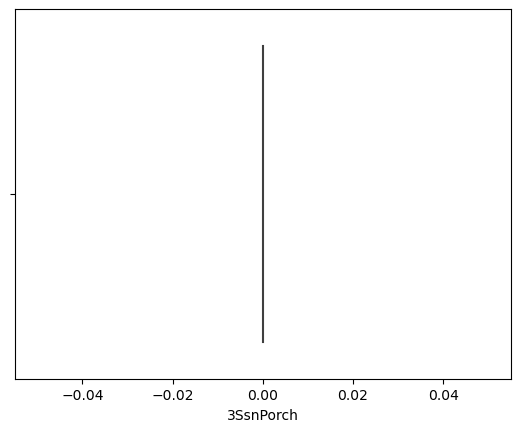

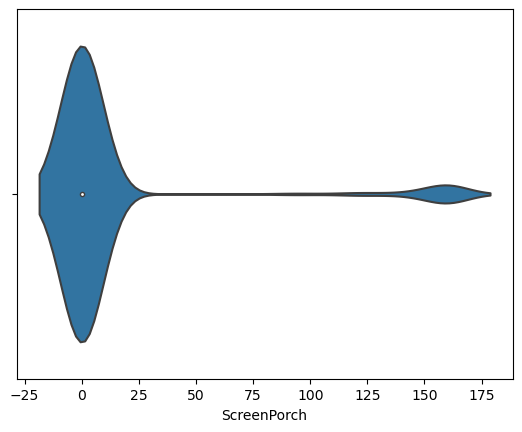

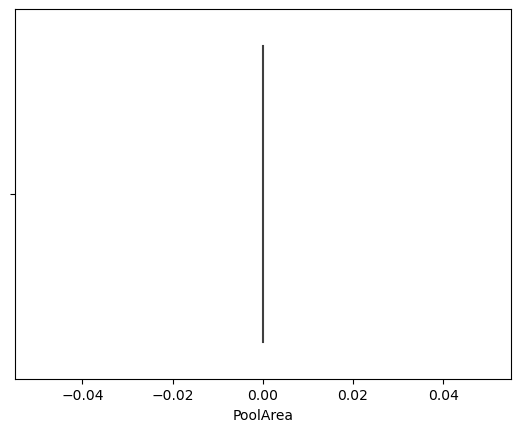

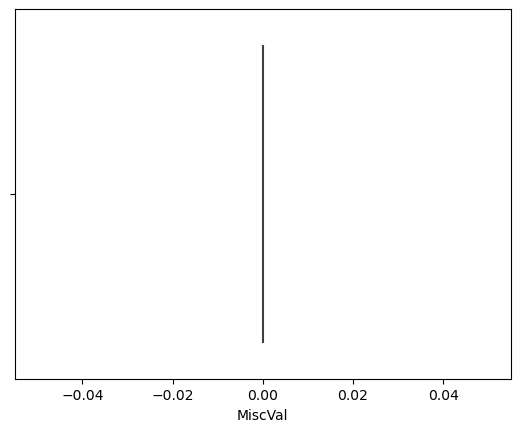

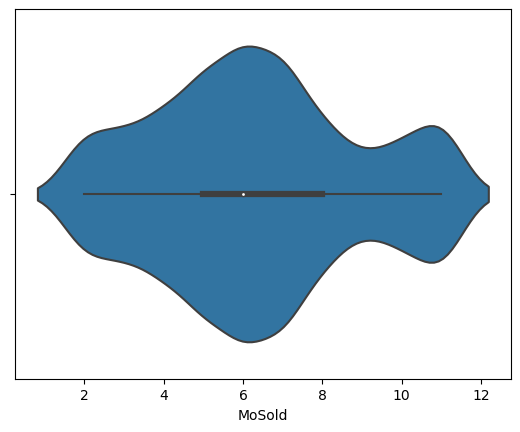

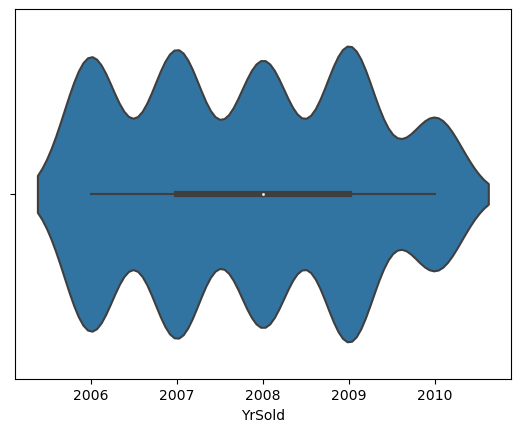

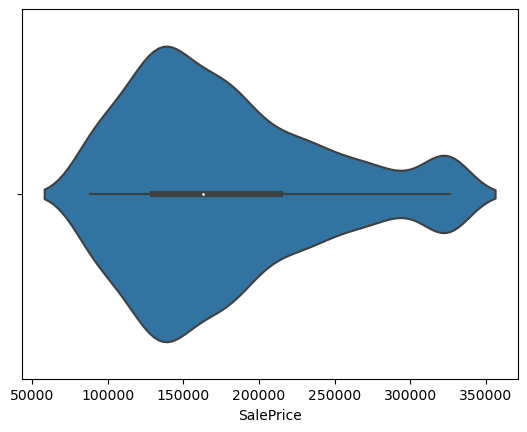

In [13]:
for col in numeric_df.columns:
    plt.figure()
    sns.violinplot(x = numeric_df[col])
    plt.xlabel(col)
    plt.show()

The plots above show that outliers have been correctly removed from the dataset. However, after outlier removal, the variables "MiscVal", "PoolArea", "3SsnPorch", "LowQualFinSF" only have zero values. Hence, these variables can be dropped from the dataset.

In [14]:
numeric_df.drop(["MiscVal", "PoolArea", "3SsnPorch", "LowQualFinSF"], axis=1, inplace=True)

c:\Users\AshitaAhuja\anaconda3\envs\gui_apnea_annotation\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
numeric_df.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.194838,9682.319212,1971.787671,1984.794521,92.555096,431.089041,32.931233,556.537671,1055.950616,1151.861370,337.731267,1498.922123,6.500685,468.187877,88.889726,42.864829,19.154075,11.580822,6.321233,2007.815753,177364.339726
std,18.741452,3469.967624,28.872129,20.565620,140.811013,412.214952,100.569218,414.582219,346.901853,333.684061,415.255848,450.732225,1.515965,202.064708,109.391899,53.144211,50.385647,40.117506,2.550967,1.328095,64562.632260
min,34.000000,3311.700000,1916.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,519.300000,672.950000,0.000000,848.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2006.000000,88000.000000
25%,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,5.000000,334.500000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,1464.000000,6.000000,480.000000,0.000000,25.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,7.000000,576.000000,168.000000,68.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,107.000000,17401.150000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,2466.100000,10.000000,850.100000,335.000000,175.050000,180.150000,160.000000,11.000000,2010.000000,326100.000000


### Handling missing values

In [16]:
numeric_df['LotFrontage'].fillna(numeric_df['LotFrontage'].median(), inplace=True)
numeric_df['MasVnrArea'].fillna(numeric_df['MasVnrArea'].median(), inplace=True)
numeric_df.isna().sum().sum()

c:\Users\AshitaAhuja\anaconda3\envs\gui_apnea_annotation\lib\site-packages\pandas\core\series.py:4530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


0

Missing values in the LotFrontage and MasVnrArea columns have been imputed using the median values to avoid losing out on data.

### EDA of categorical features

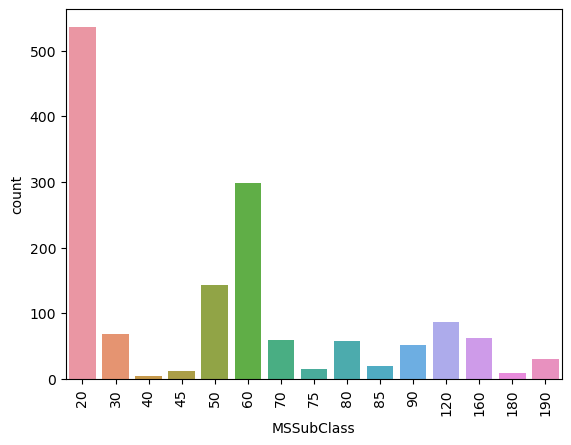

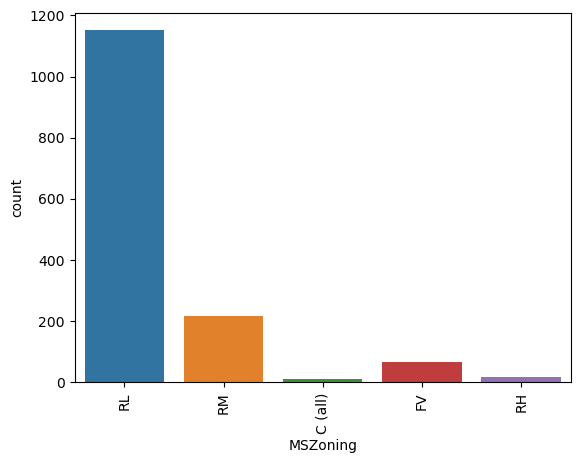

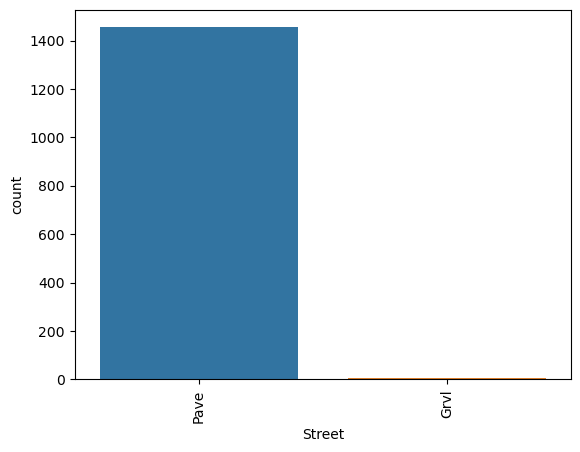

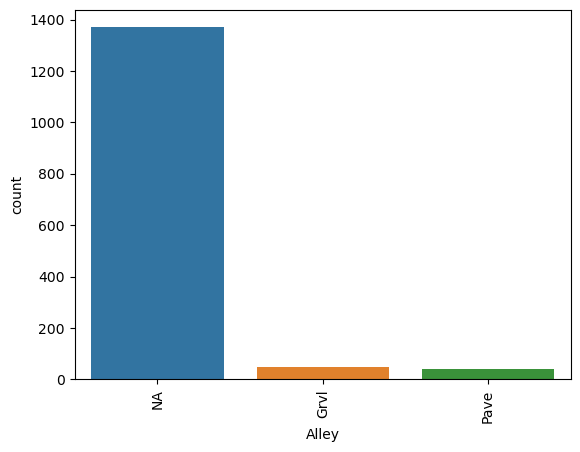

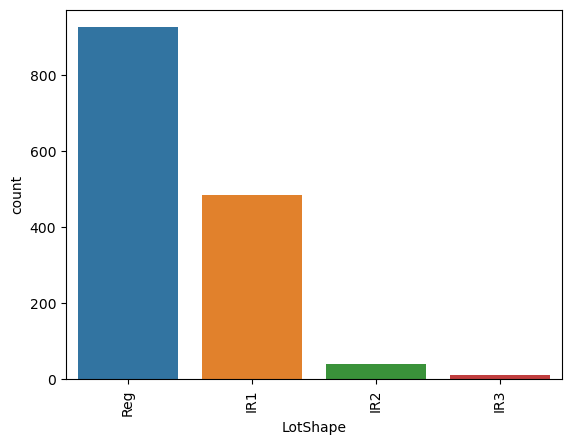

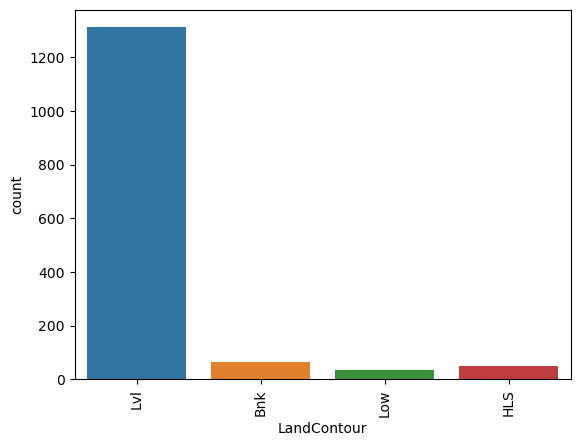

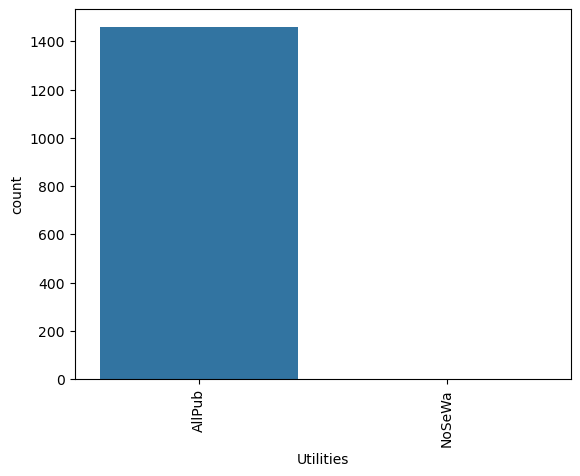

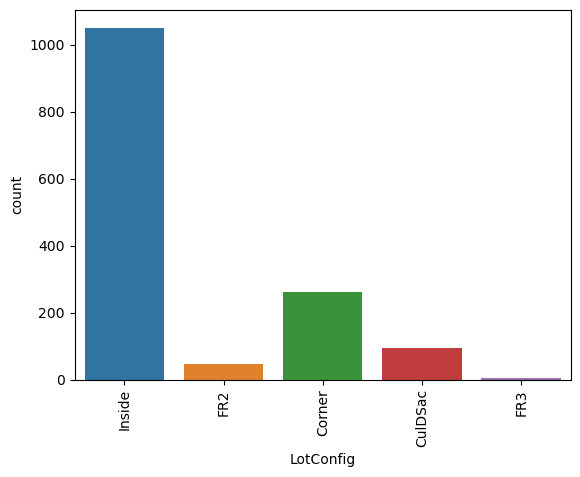

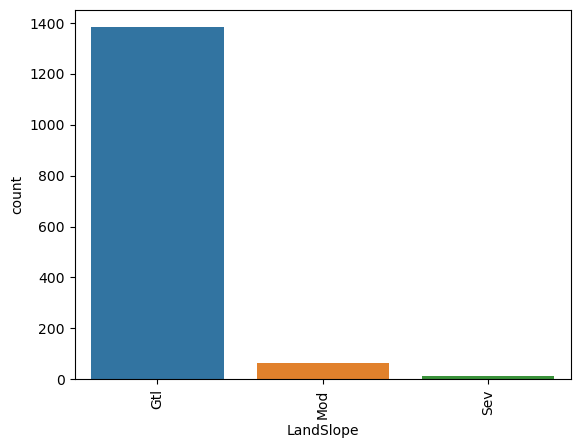

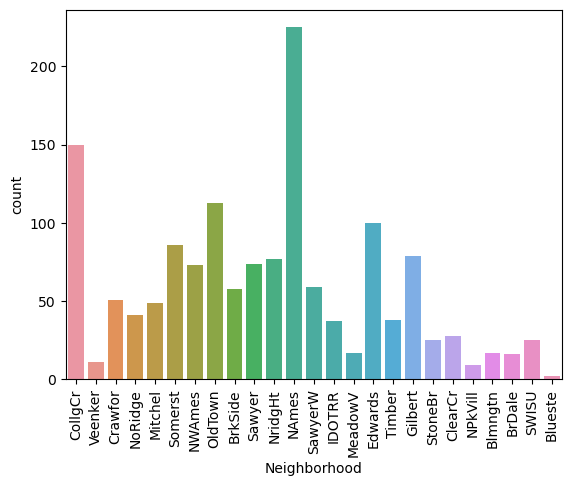

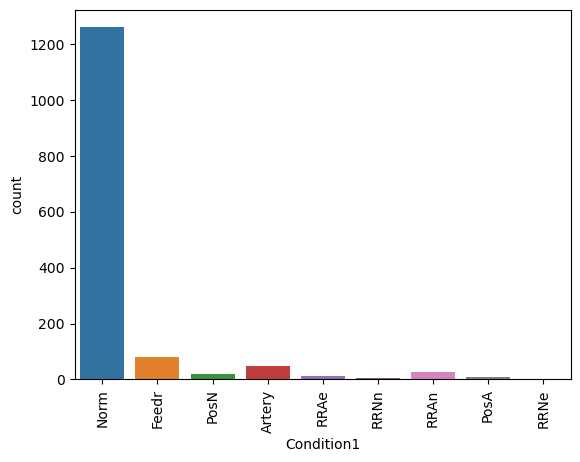

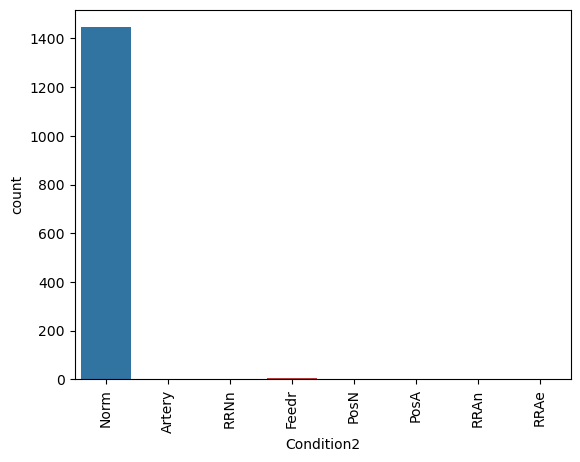

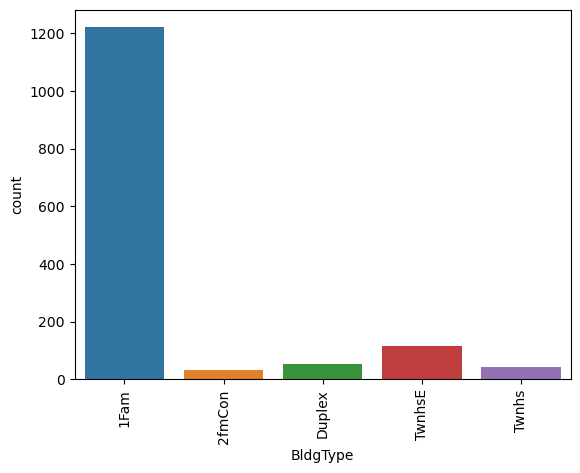

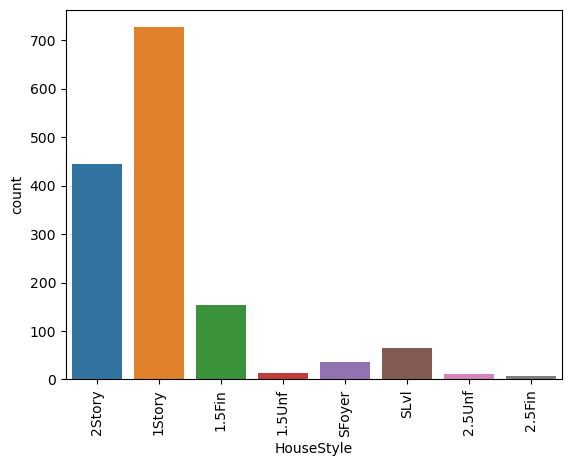

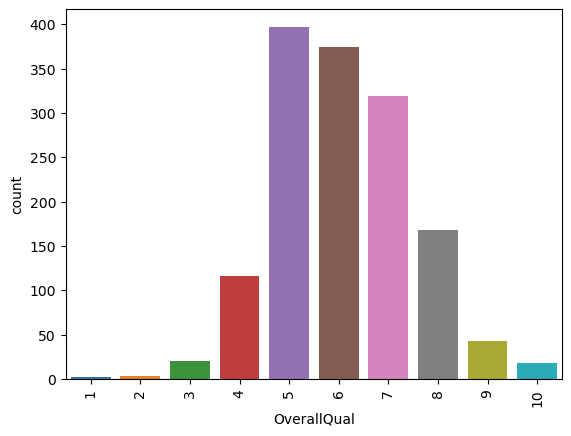

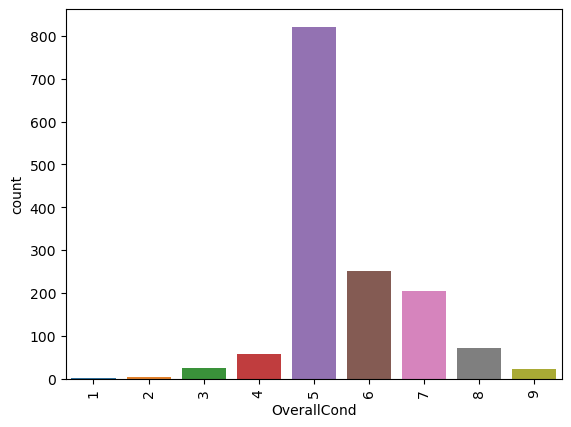

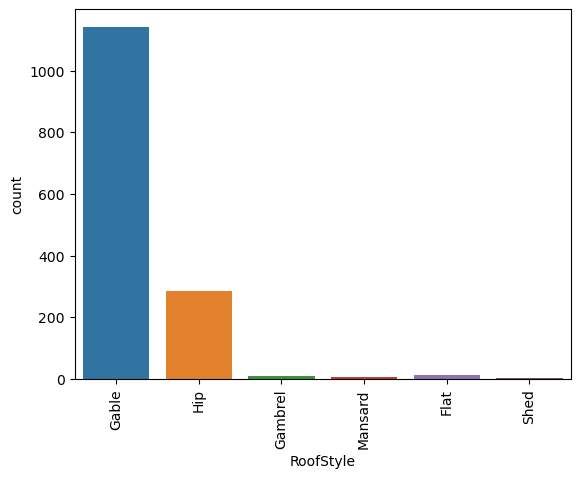

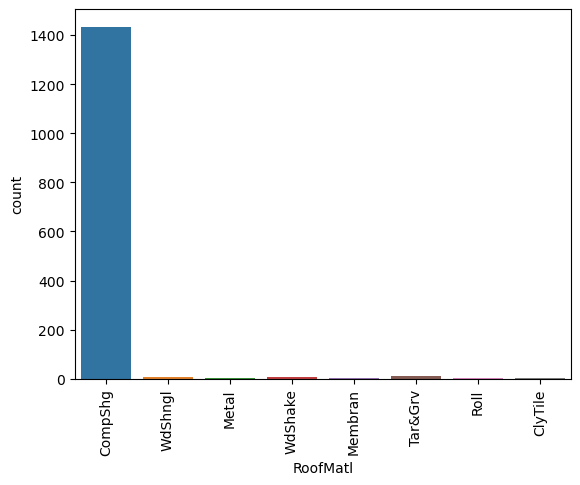

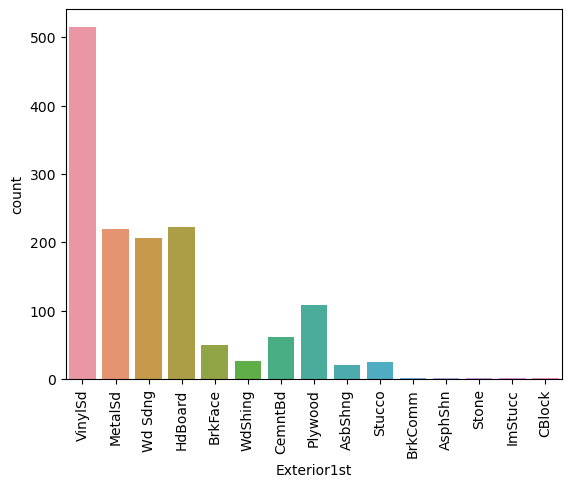

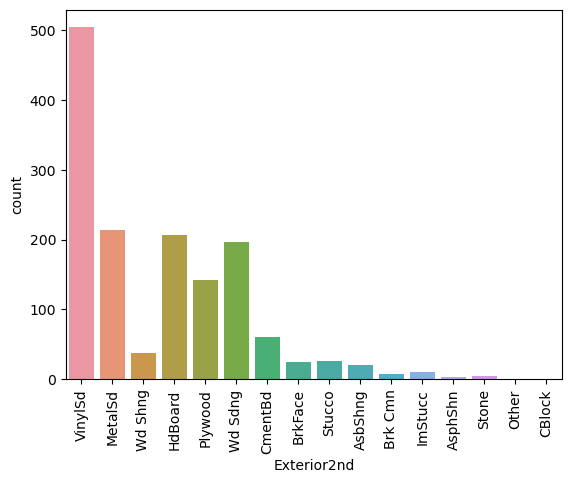

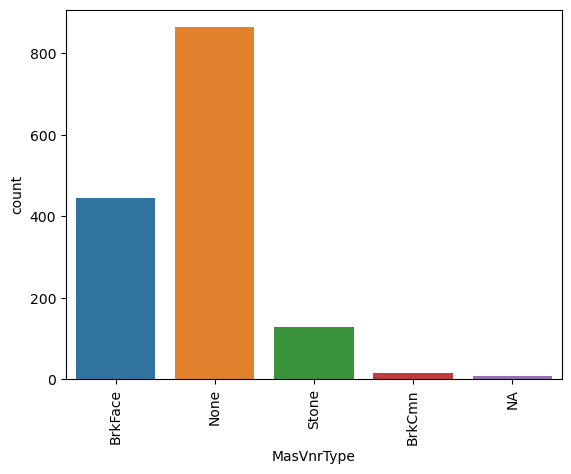

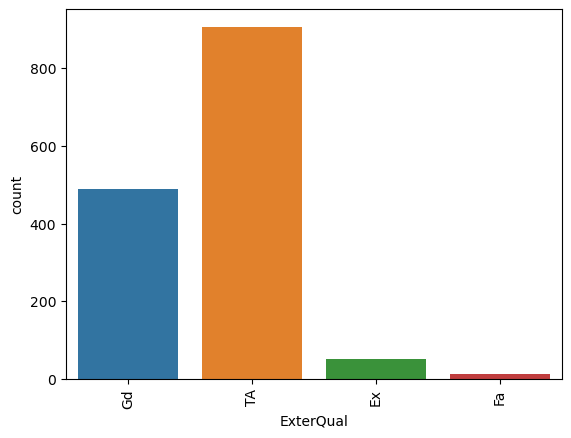

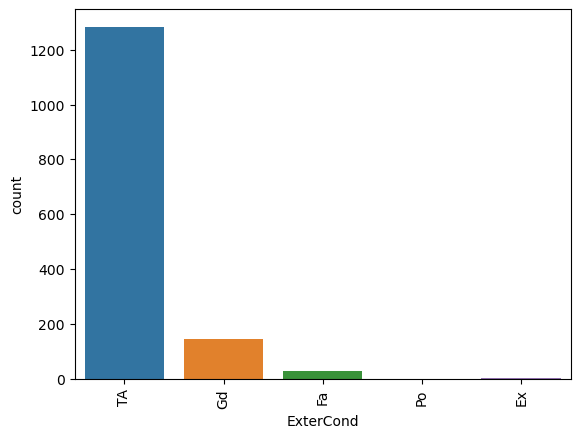

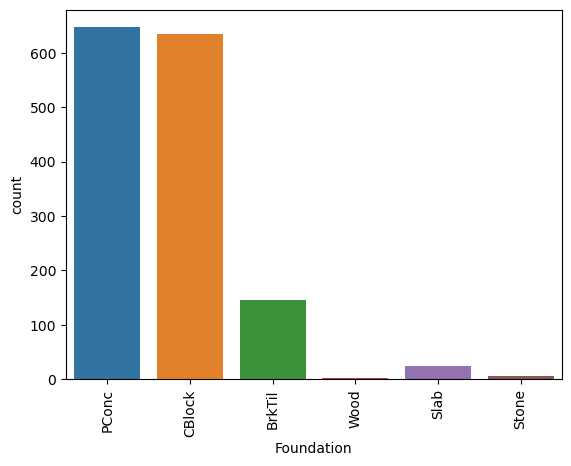

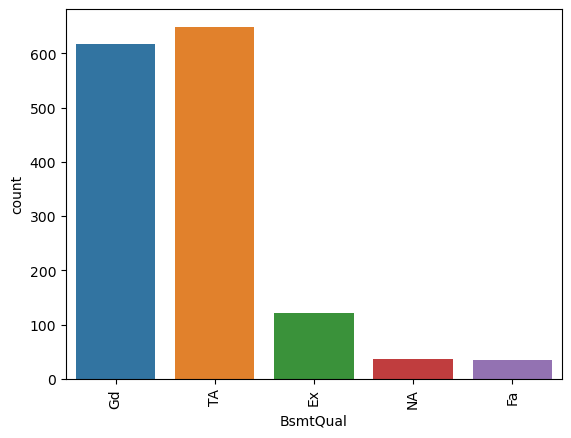

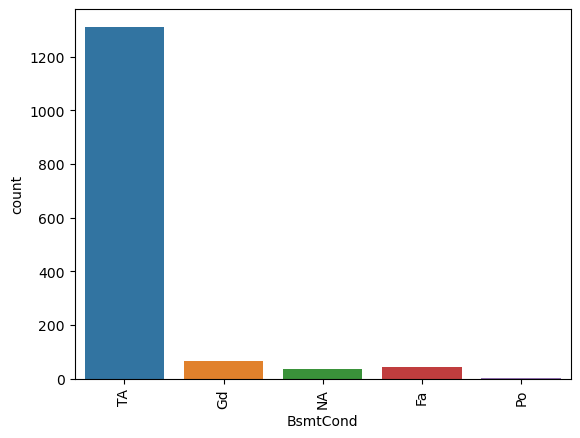

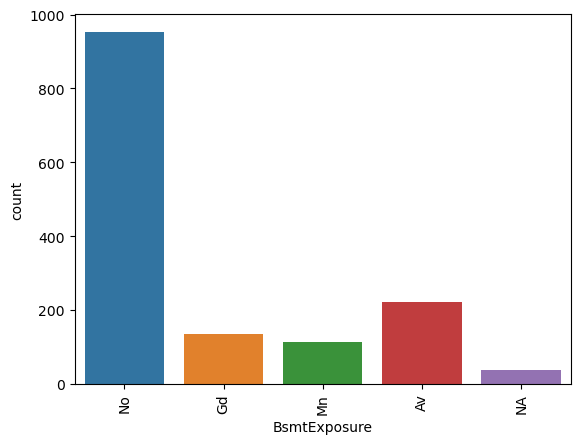

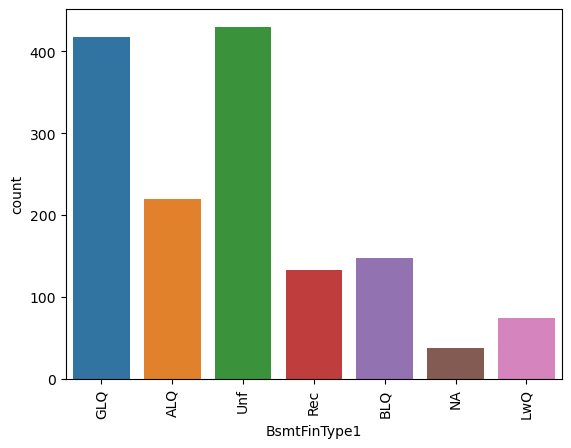

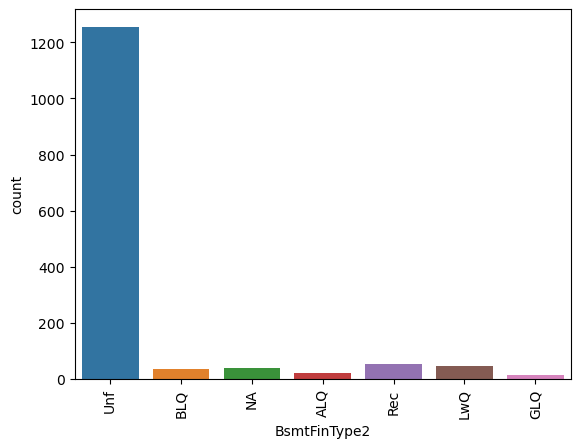

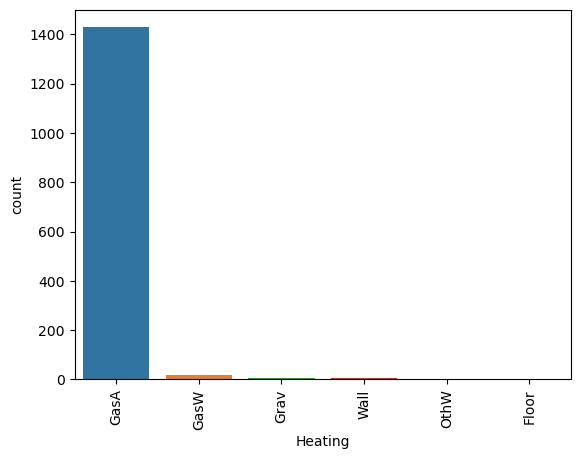

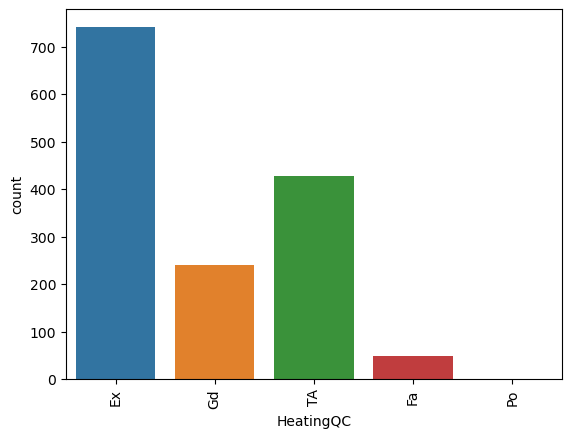

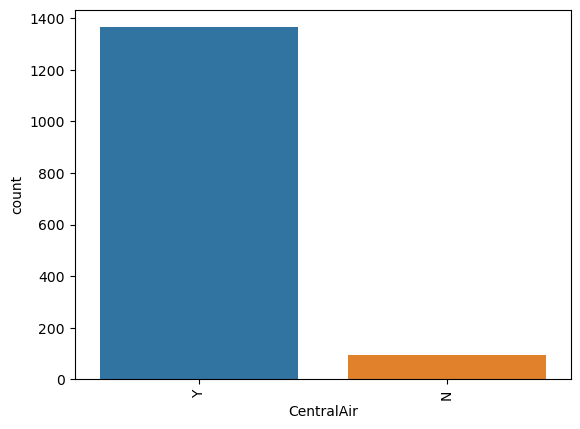

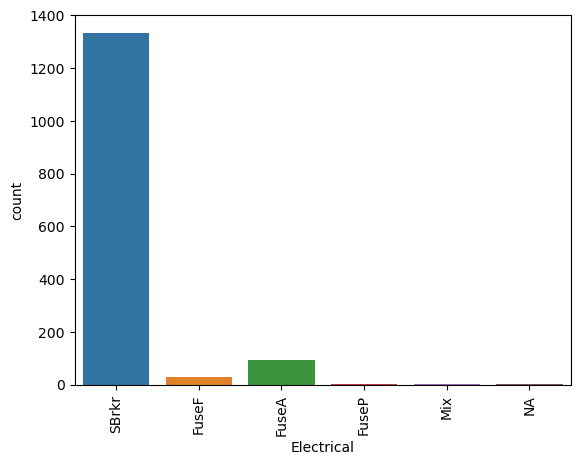

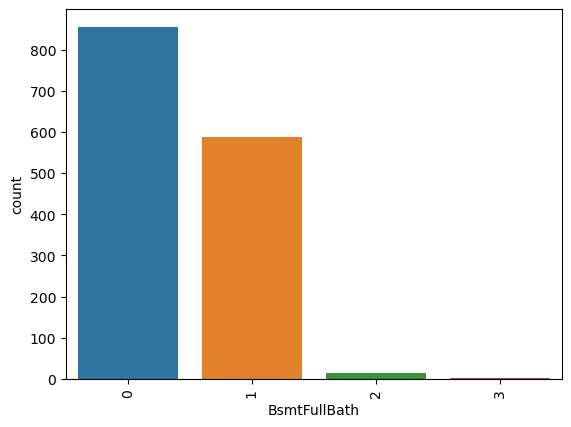

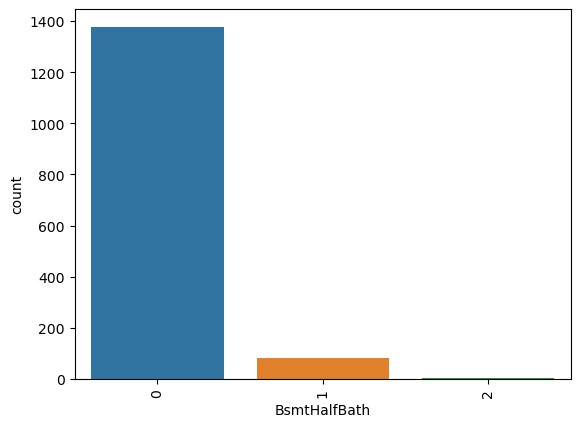

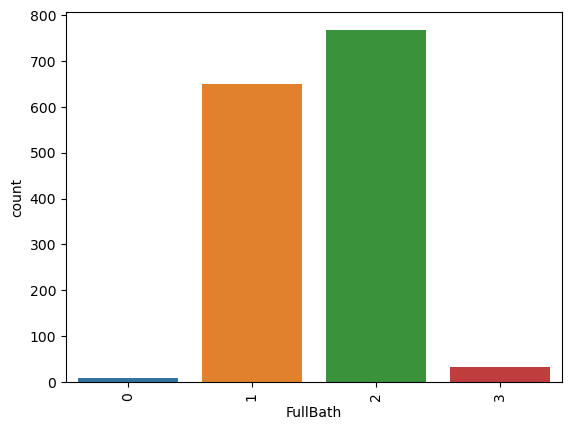

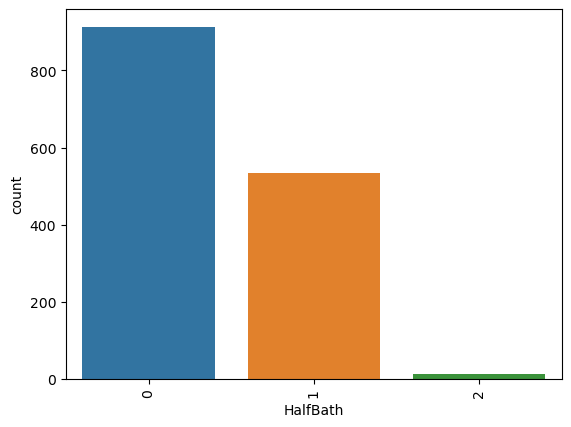

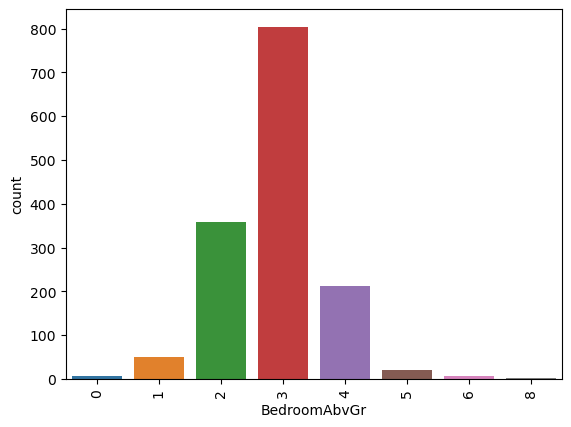

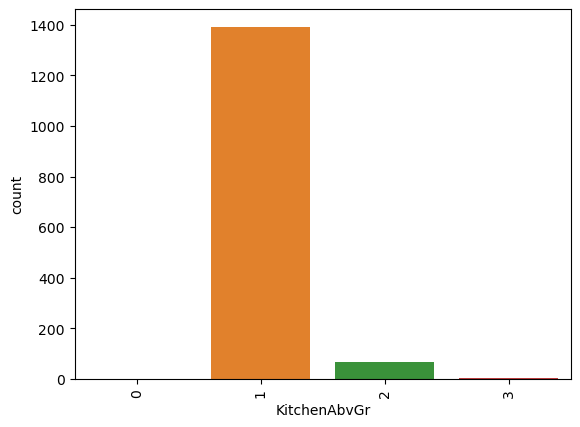

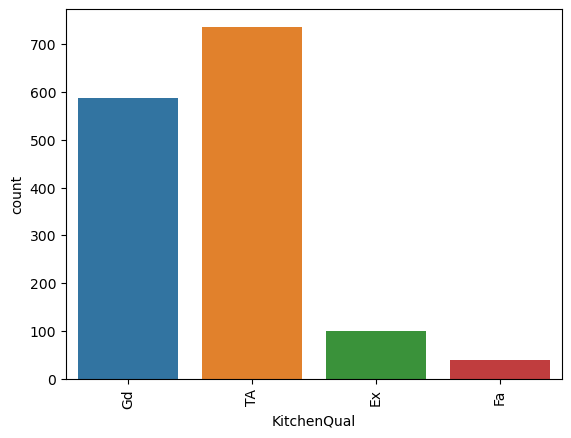

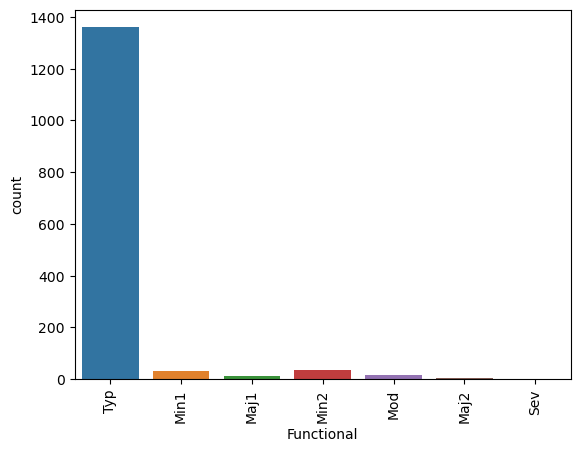

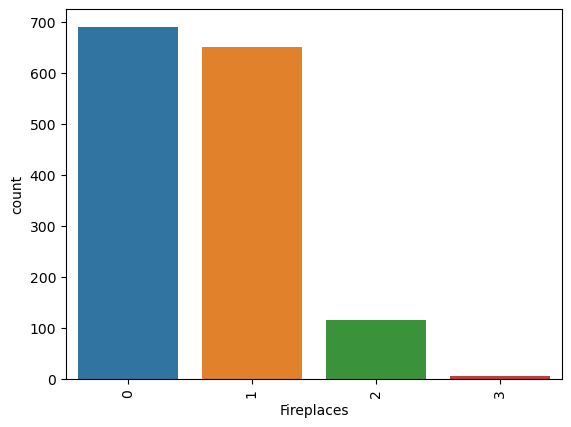

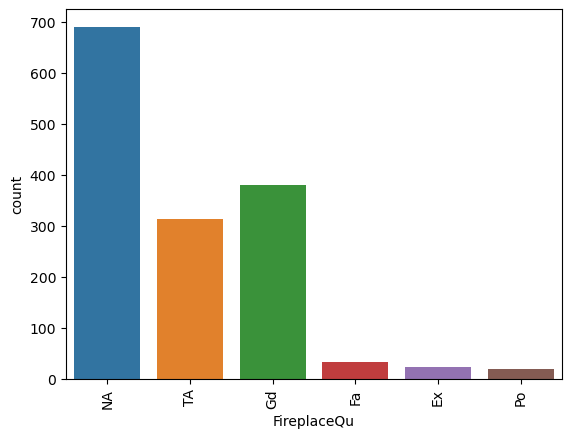

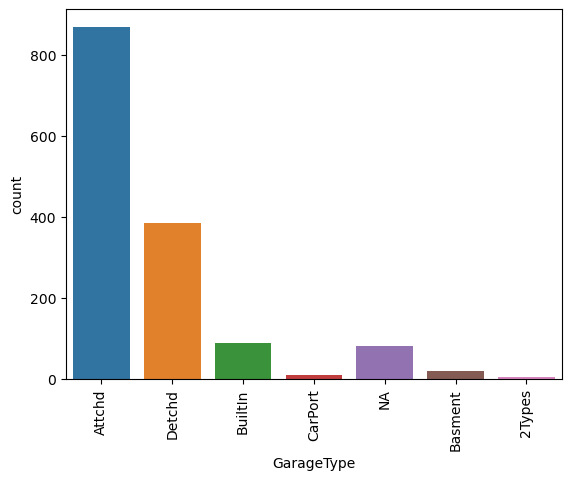

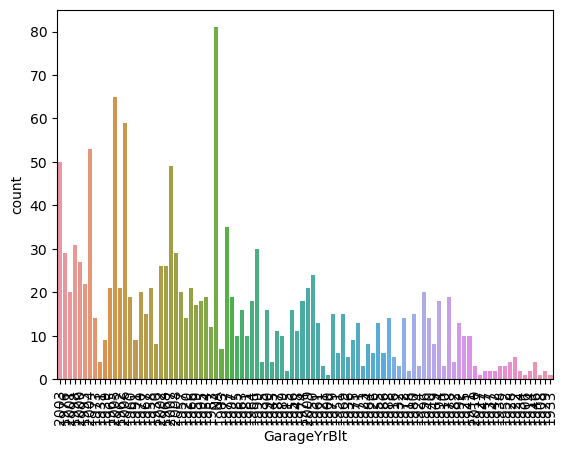

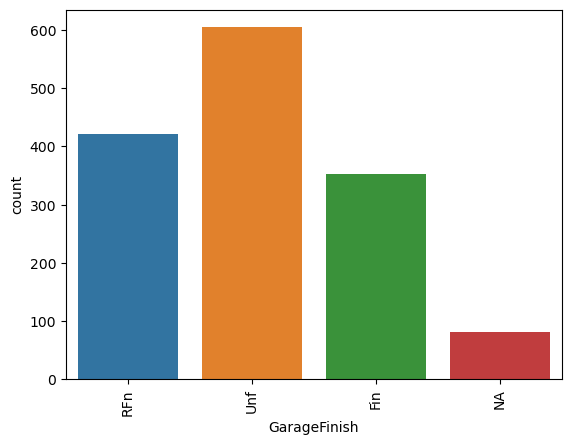

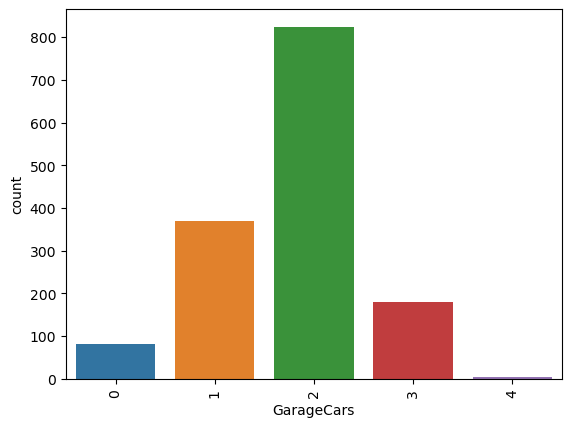

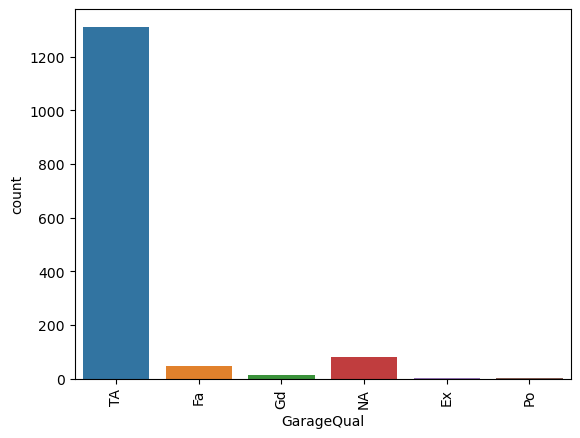

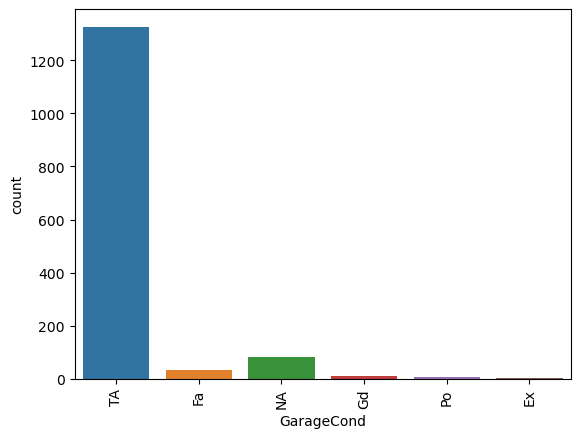

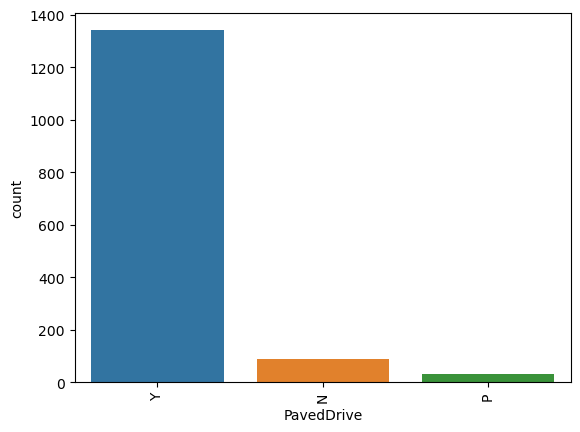

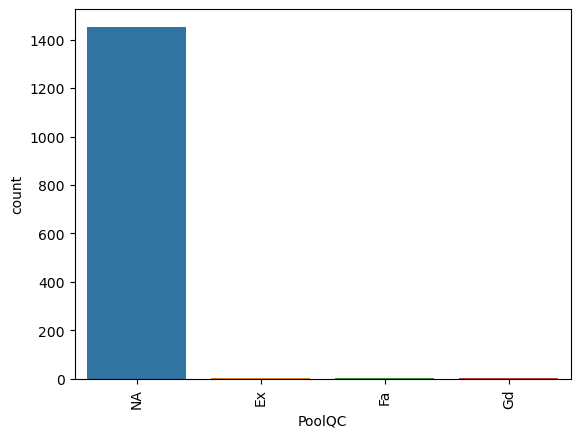

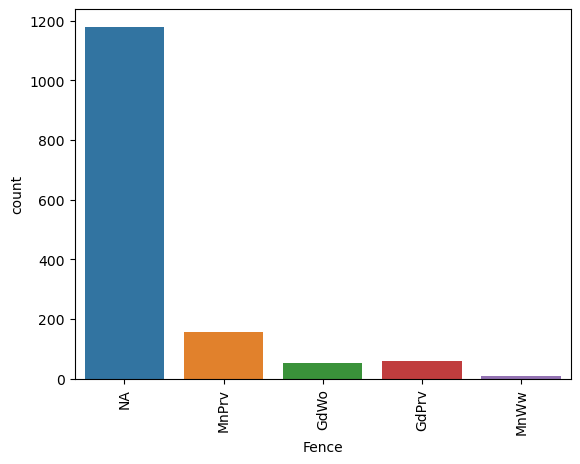

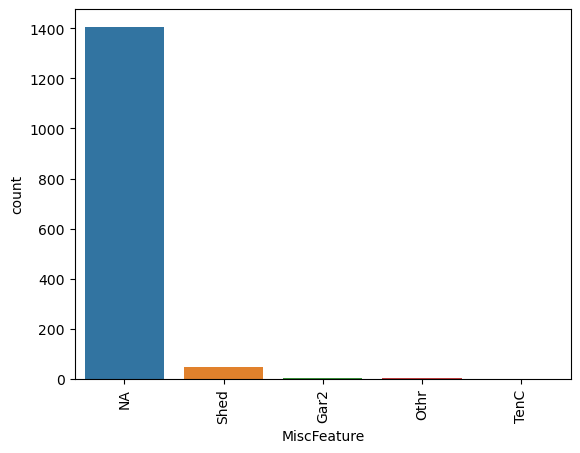

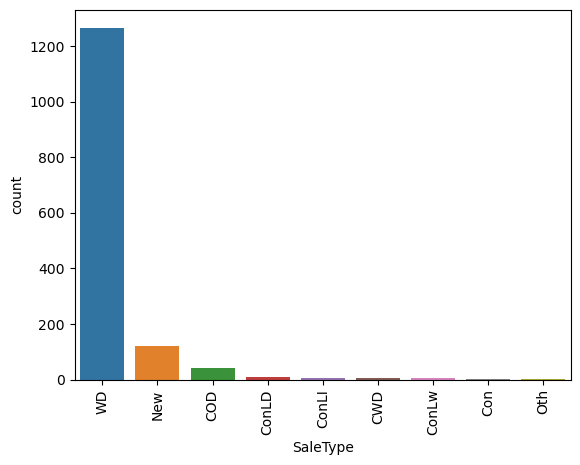

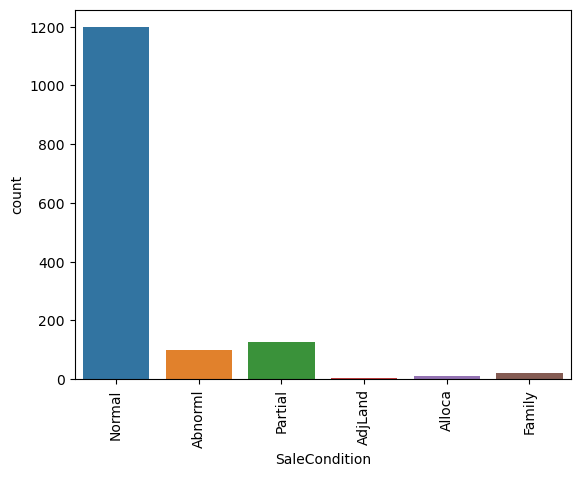

In [17]:
categorical_df = df.select_dtypes(include=['object'])
for col in categorical_df.columns:
    plt.figure()
    sns.countplot(x=df[col])
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.show()

### Check correlation of numeric variables

<AxesSubplot:>

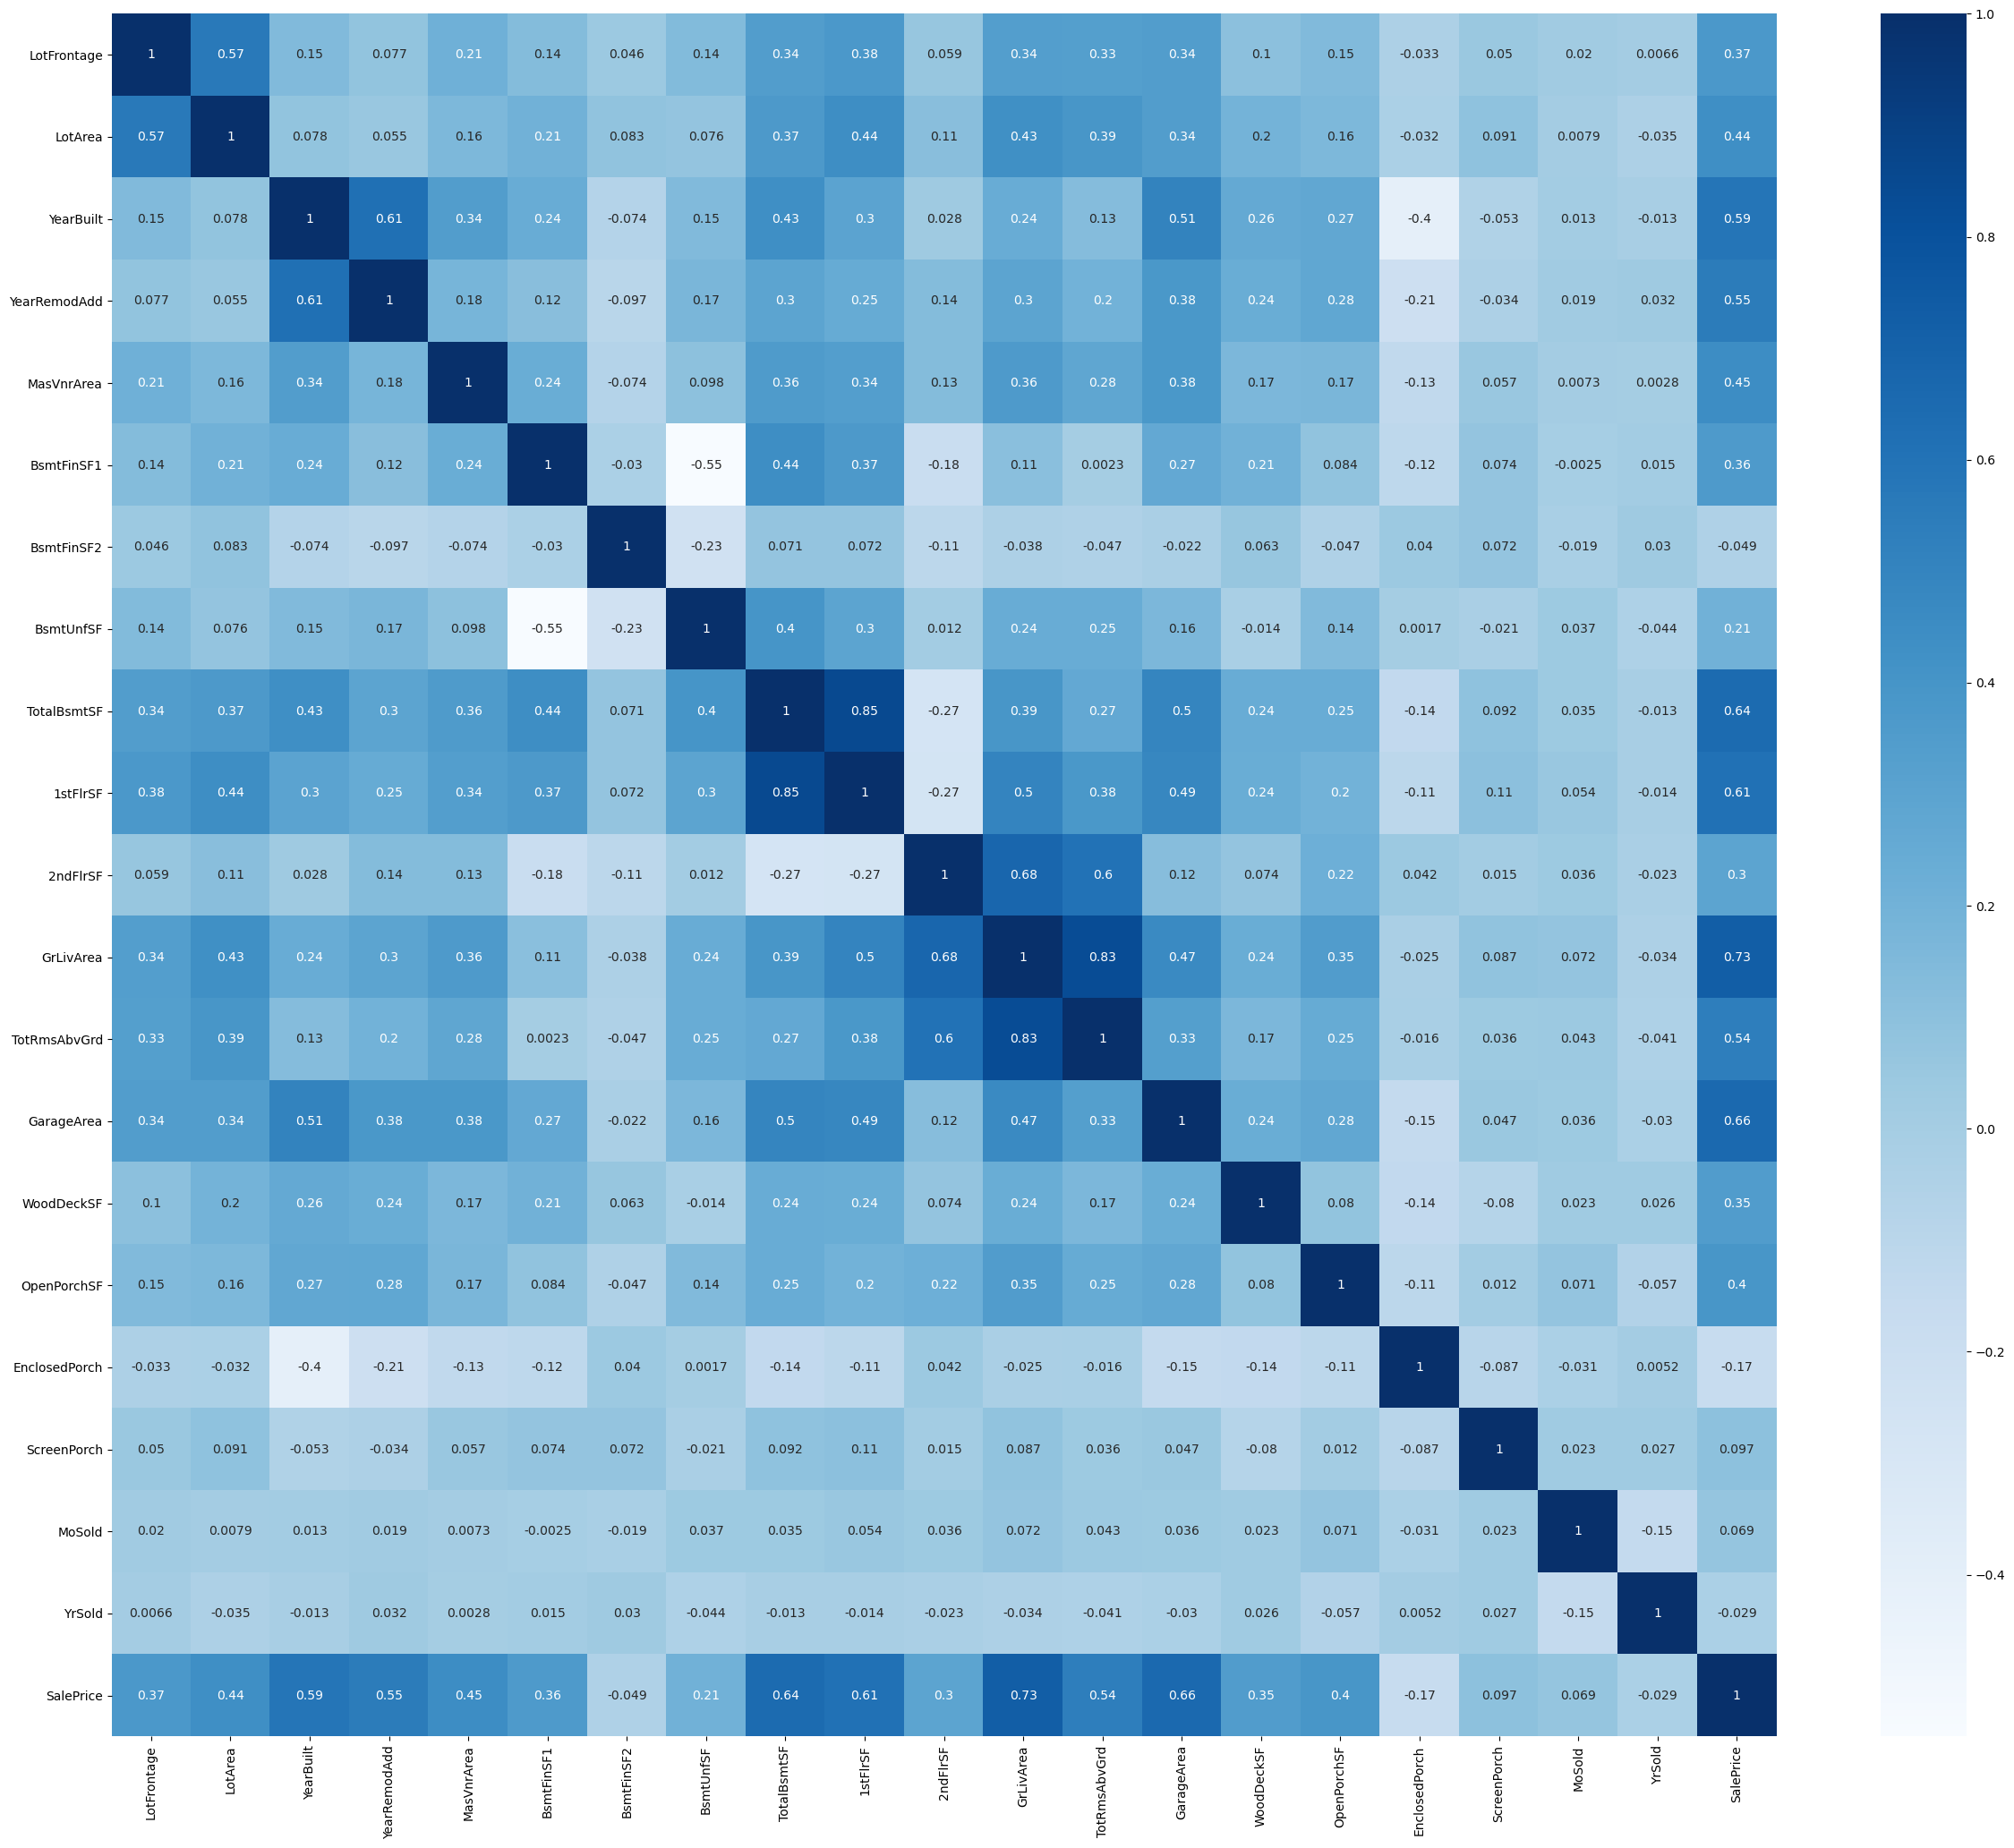

In [49]:
plt.figure(figsize=(30, 25))
sns.heatmap(numeric_df.corr(), annot=True, cmap="Blues")

## Data preparation for modelling

### Creating dummy variables

In [19]:
## Create dummy variables for categorical features
categorical_df_encoded = pd.get_dummies(categorical_df, drop_first=True)
categorical_df_encoded.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageYrBlt_1906,GarageYrBlt_1908,GarageYrBlt_1910,GarageYrBlt_1914,GarageYrBlt_1915,GarageYrBlt_1916,GarageYrBlt_1918,GarageYrBlt_1920,GarageYr

### Splitting the dataset into train & test sets

In [20]:
all_df = pd.concat([numeric_df, categorical_df_encoded], axis=1)

np.random.seed(0)
df_train, df_test = train_test_split(all_df, train_size = 0.8, test_size = 0.2, random_state = 100)

### Scaling the variables

In [ ]:
scaler = MinMaxScaler()
to_scale_cols = df_train.select_dtypes(include=["int64", "float64"]).columns
df_train[to_scale_cols] = scaler.fit_transform(df_train[to_scale_cols])
df_test[to_scale_cols] = scaler.transform(df_test[to_scale_cols])


In [22]:
y_train = df_train.pop("SalePrice")
X_train = df_train

y_test = df_test.pop("SalePrice")
X_test = df_test

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 400)
(292, 400)
(1168,)
(292,)


In [24]:
def display_metrics(y_true, y_pred, set="train"):
    metrics = {}
    metrics[f"{set}_r_squared"] = r2_score(y_true, y_pred)
    #Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
    rss = np.sum(np.square(y_true - y_pred))
    metrics[f"{set}_rss"] = rss
    mse = mean_squared_error(y_true, y_pred)
    metrics[f"{set}_mse"] = mse
    # Root Mean Squared Error
    rmse = mse**0.5
    metrics[f"{set}_rmse"] = rmse
    print(metrics)
    return metrics

## Fitting Multiple Linear Regression

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)


y_train_pred = lr.predict(X_train)
lr_train_metrics = display_metrics(y_train, y_train_pred, "train")


y_test_pred = lr.predict(X_test)
lr_test_metrics = display_metrics(y_test, y_test_pred, "test")


{'train_r_squared': 0.9599402346990651, 'train_rss': 3.457096607116577, 'train_mse': 0.0029598429855450144, 'train_rmse': 0.05440443902426542}
{'test_r_squared': -1.3156470038766105e+21, 'test_rss': 2.75932230738702e+22, 'test_mse': 9.449733929407603e+19, 'test_rmse': 9720974194.702711}


## Residual analysis

c:\Users\AshitaAhuja\anaconda3\envs\gui_apnea_annotation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


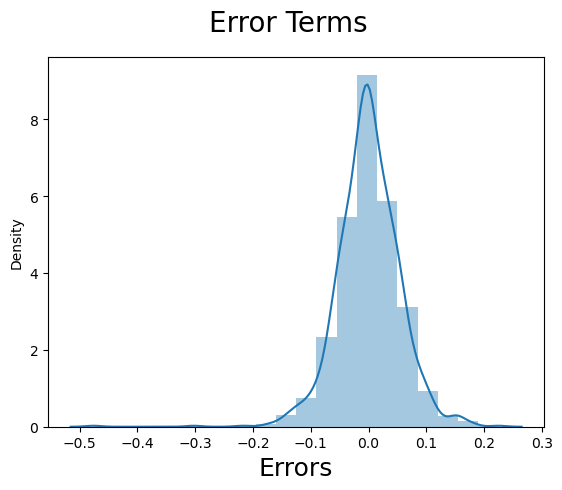

In [26]:
%matplotlib inline

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 
plt.show()

Text(0.5, 0, 'y_train')

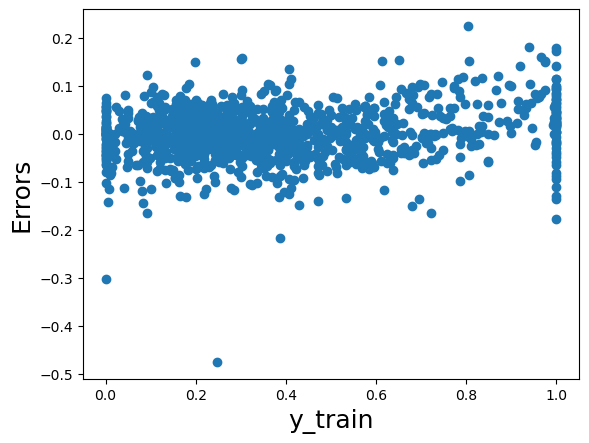

In [27]:
plt.scatter(y_train, (y_train - y_train_pred))
plt.ylabel('Errors', fontsize = 18) 
plt.xlabel('y_train', fontsize = 18) 

The residual analysis shows that the assumptions of linear regression are satisfied and we can interpret the results correctly.

## Fitting Ridge Regression

In [28]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

In [29]:
ridge = Ridge()

ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
ridgeCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 117 out of 140 | elapsed:    2.9s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    3.0s finished


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

## Optimal value of lambda for Ridge Regression

In [30]:
ridgeCV.best_params_

{'alpha': 10.0}

In [31]:
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
ridge_train_metrics = display_metrics(y_train, y_train_pred, "train")
ridge_test_metrics = display_metrics(y_test, y_test_pred, "test")

{'train_r_squared': 0.9399229786791501, 'train_rss': 5.184555251728685, 'train_mse': 0.004438831551137572, 'train_rmse': 0.06662455666747488}
{'test_r_squared': 0.9061486130563791, 'test_rss': 1.9683564421891977, 'test_mse': 0.006740946719826019, 'test_rmse': 0.0821032686305851}


## Fitting Lasso Regression

In [32]:
lasso = Lasso()

lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lasso_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 117 out of 140 | elapsed:    0.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.7s finished


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

## Optimal value of lambda for Lasso Regression

In [33]:
lasso_cv.best_params_

{'alpha': 0.0001}

In [34]:
lasso_cv = Lasso(alpha=0.0001)
lasso_cv.fit(X_train, y_train)
y_train_pred = lasso_cv.predict(X_train)
y_test_pred = lasso_cv.predict(X_test)
lasso_train_metrics = display_metrics(y_train, y_train_pred, "train")
lasso_test_metrics = display_metrics(y_test, y_test_pred, "test")

{'train_r_squared': 0.9523989910329937, 'train_rss': 4.107894426214287, 'train_mse': 0.0035170328991560675, 'train_rmse': 0.0593045773878886}
{'test_r_squared': 0.8088622149344811, 'test_rss': 4.008755787546306, 'test_mse': 0.013728615710775022, 'test_rmse': 0.11716917559996325}


## Comparing Ridge & Lasso Regression

In [35]:
coefficients = pd.DataFrame()
coefficients["features"] = X_train.columns
coefficients["ridge_coeff"] = ridge.coef_
coefficients["lasso_coeff"] = lasso_cv.coef_
coefficients = coefficients.round(2)
coefficients.index = coefficients.features


In [36]:
coefficients

,features,ridge_coeff,lasso_coeff
features,,,
LotFrontage,LotFrontage,0.01,0.00
LotArea,LotArea,0.06,0.06
YearBuilt,YearBuilt,0.04,0.12
YearRemodAdd,YearRemodAdd,0.04,0.03
MasVnrArea,MasVnrArea,0.02,0.02
BsmtFinSF1,BsmtFinSF1,0.06,0.05
BsmtFinSF2,BsmtFinSF2,0.01,0.01
BsmtUnfSF,BsmtUnfSF,-0.00,-0.01
TotalBsmtSF,TotalBsmtSF,0.09,0.12


## Significant predictor variables for Ridge regression

On the test set, ridge regression model is able to explain around 91% of the variance in the sale price. The variables contributing the most to the prediction of sale price and their respective coefficients are as follows:

In [37]:
coefficients.ridge_coeff.sort_values(ascending=False)[:5]

features
GrLivArea        0.14
OverallQual_9    0.10
TotalBsmtSF      0.09
1stFlrSF         0.08
OverallQual_8    0.07
Name: ridge_coeff, dtype: float64

## Significant predictor variables for Lasso Regression

On the test set, lasso regression model is able to explain around 81% of the variance in the sale price. The variables contributing the most to the prediction of sale price and their respective coefficients are as follows:

In [38]:
coefficients.lasso_coeff.sort_values(ascending=False)[:5]

features
GrLivArea          0.27
Condition2_PosA    0.23
OverallQual_9      0.14
YearBuilt          0.12
TotalBsmtSF        0.12
Name: lasso_coeff, dtype: float64

## Question 1

### Doubling the optimal values of alpha for Ridge regression

In [39]:
ridge = Ridge(alpha=20)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
ridge_train_metrics = display_metrics(y_train, y_train_pred, "train")
ridge_test_metrics = display_metrics(y_test, y_test_pred, "test")

{'train_r_squared': 0.9321381484951508, 'train_rss': 5.856374215567071, 'train_mse': 0.005014019020177287, 'train_rmse': 0.07080973817334228}
{'test_r_squared': 0.9069502879222671, 'test_rss': 1.9515428186701347, 'test_mse': 0.006683365817363475, 'test_rmse': 0.08175185513102118}


After doubling the optimal value of alpha, there was not a significant change in the train and test r-squared metrics. The train r-squared value dropped by 0.7% points. 

In [40]:
coefficients = pd.DataFrame()
coefficients["features"] = X_train.columns
coefficients["ridge_coeff"] = ridge.coef_
coefficients = coefficients.round(2)
coefficients.index = coefficients.features

The variables contributing the most to the prediction of sale price and their respective coefficients are as follows:

In [41]:
coefficients.ridge_coeff.sort_values(ascending=False)[:5]

features
GrLivArea        0.11
TotalBsmtSF      0.09
OverallQual_9    0.08
1stFlrSF         0.08
OverallQual_8    0.07
Name: ridge_coeff, dtype: float64

### Doubling the optimal values of alpha for Lasso regression

In [42]:
lasso_cv = Lasso(alpha=0.0002)
lasso_cv.fit(X_train, y_train)
y_train_pred = lasso_cv.predict(X_train)
y_test_pred = lasso_cv.predict(X_test)
lasso_train_metrics = display_metrics(y_train, y_train_pred, "train")
lasso_test_metrics = display_metrics(y_test, y_test_pred, "test")

{'train_r_squared': 0.9454218451414373, 'train_rss': 4.710011468285286, 'train_mse': 0.004032544065312745, 'train_rmse': 0.06350231543268911}
{'test_r_squared': 0.8536422345279338, 'test_rss': 3.069579043135688, 'test_mse': 0.010512256997040028, 'test_rmse': 0.10252929823733326}


After doubling the optimal value of alpha, the test r-squared value increased from approximately 81% to approximately 85%.

In [43]:
coefficients = pd.DataFrame()
coefficients["features"] = X_train.columns
coefficients["lasso_coeff"] = lasso_cv.coef_
coefficients = coefficients.round(2)
coefficients.index = coefficients.features

The variables contributing the most to the prediction of sale price and their respective coefficients are as follows:

In [44]:
coefficients.lasso_coeff.sort_values(ascending=False)[:5]

features
GrLivArea        0.26
OverallQual_9    0.16
TotalBsmtSF      0.12
OverallQual_8    0.11
YearBuilt        0.11
Name: lasso_coeff, dtype: float64

## Question 2

In this particular case, the Ridge regression model seems to generalize much better on the test set than the Lasso regression model. Hence, the regression model will be chosen.

## Question 3

In [45]:
top_vars  = ["GrLivArea", "Condition2_PosA", "OverallQual_9", "YearBuilt", "TotalBsmtSF"]
X_train_new = X_train.drop(top_vars, axis=1, )
X_test_new = X_test.drop(top_vars, axis=1, )


lasso = Lasso()

lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lasso_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.7s finished


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [46]:
lasso_cv.best_params_

{'alpha': 0.0001}

In [47]:
lasso_cv = Lasso(alpha=0.0001)
lasso_cv.fit(X_train_new, y_train)
y_train_pred = lasso_cv.predict(X_train_new)
y_test_pred = lasso_cv.predict(X_test_new)
lasso_train_metrics = display_metrics(y_train, y_train_pred, "train")
lasso_test_metrics = display_metrics(y_test, y_test_pred, "test")

{'train_r_squared': 0.947929173544489, 'train_rss': 4.493632853732724, 'train_mse': 0.0038472884021684283, 'train_rmse': 0.06202651370316107}
{'test_r_squared': 0.7955876715948679, 'test_rss': 4.287164383844876, 'test_mse': 0.01468206980768793, 'test_rmse': 0.12116959110143076}


After excluding the 5 most important predictor variables and creating another model, the 5 most important predictor variables are the following:

In [48]:
coefficients = pd.DataFrame()
coefficients["features"] = X_train_new.columns
coefficients["lasso_coeff"] = lasso_cv.coef_
coefficients = coefficients.round(2)
coefficients.index = coefficients.features
coefficients.lasso_coeff.sort_values(ascending=False)[:5]

features
1stFlrSF         0.24
2ndFlrSF         0.21
BsmtFinSF1       0.13
GarageArea       0.10
OverallCond_9    0.10
Name: lasso_coeff, dtype: float64

## Question 4

To ensure that a model is robust and generalisable, there has to be a balance between variance and bias. As the complexity of a model increases, the bias decreases and the variance increases. A low bias and high variance model will have overfit the training data, memorized the noise in the data and hence will not perform well on an unseen dataset. On the other hand, a high bias and low variance model would not have learnt the underlying patterns of the data distribution. Therefore, to ensure that the model is not too complex, regularization techniques such as ridge and lasso regression can be used. The implication of regularization is that the bias might increase as the variance decreases and hence the accuracy of the model could be lower.